# Heart Disease Prediction

#### Osama Alfawzan

### Table of Contents

   * [1. Introduction](#1)
       * [1.1 Phase 1 Summary](#1.1)
       * [1.2 Report Overview](#1.2)
       * [1.3 Overview of Methodology](#1.3)
   * [2. Predictive Modelling](#2)
       * [2.1 Feature Selection (FS)](#2.1)
           * [2.1.1 FS Using Random Forest Importance](#2.1.1)
           * [2.1.2 FS Performance Comparison Technique Using Paired T-Tests](#2.1.2)
       * [2.2 Model Fitting and Tuning](#2.2)
           * [2.2.1 Fitting and Tuning parameters for K-Nearest Neighbors Classifier](#2.2.1)
           * [2.2.2 Fitting and Tuning parameters for Decision Tree Classifier](#2.2.2)
           * [2.2.3 Fitting and Tuning parameters for Random Forest Classifier](#2.2.3)
           * [2.2.4 Fitting and Tuning parameters for Gaussian Naive Bayes Classifier](#2.2.4)
           * [2.2.5 Fitting and Tuning parameters for Support Vector Machine Classifier](#2.2.5)
           * [2.2.6 Neural Network Model Fitting and Tuning](#2.2.6)
       * [2.3 Model Comparison](#2.3)
           * [2.3.1 Comparing the classefiers by Cross validation using Paired T-Tests](#2.3.1)
           * [2.3.2 Comparing the classefiers using the classification reports](#2.3.2)
           * [2.3.3 The Confusion Matrices](#2.3.3)
           * [2.3.4 ROC Curves for classifiers](#2.3.4)
   * [3. Critique and Limitations](#3)
   * [4. Summary and Conclusions](#4)
       * [4.1 Project Summary](#4.1)
       * [4.2 Summary of Findings](#4.2)
       * [4.3 Conclusions](#4.3)
   * [5. References](#5)

### 1. Introduction:  <a class="anchor" id="1"></a>

In this report, we will develop a heart disease prediction model based on the "Statlog (Heart)" dataset. Our primary objective is to leverage this dataset to create an accurate and reliable predictive model that can assist in early detection and diagnosis of heart disease. Through the phases of predictive modeling, feature selection, and model fitting and tuning, we aim to provide valuable insights and a robust model for improved heart disease prediction. Additionally, we will explore the application of neural network models to enhance the accuracy and performance of our predictions.

#### 1.1 Phase 1 Summary:  <a class="anchor" id="1.1"></a>


In the Phase 1 report, we conducted data cleaning and preprocessing on the "Statlog (Heart)" dataset obtained from the UCI Machine Learning Repository. This involved tasks such as summary statistics, data type checking, outlier handling, and dealing with missing values. Visualizations were also used to gain insights into the dataset.

Moving on to Phase 2, our focus shifts to developing a heart disease prediction model. This entails feature selection, model fitting and tuning, optimization, and result analysis. Our objective is to create an accurate and effective model that can predict heart disease, thereby improving patient diagnosis and treatment. The Phase 2 report will provide a comprehensive overview of the methodology employed.

The "Statlog (Heart)" dataset contains 270 observations and 13 features. These features include the patient's age, sex, chest pain type, resting blood pressure, cholesterol measurement, fasting blood sugar, resting electrocardiographic measurement, maximum heart rate achieved, exercise-induced angina, ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, the number of major vessels colored by fluoroscopy, and thalassemia. The target feature indicates the presence or absence of heart disease, with 1 representing the presence and 0 representing the absence.

#### 1.2 Report Overview:  <a class="anchor" id="1.2"></a>

In Phase 2, the primary objective of the project is to develop a robust model capable of predicting the target attribute, which indicates the presence or absence of heart disease. This includes feature selection, model fitting and tuning, and model comparison. Feature selection techniques will help identify the most influential attributes for accurate heart disease prediction. Machine learning models will be trained and optimized using different algorithms to achieve the highest performance. Neural network models will be explored to further enhance prediction capabilities.

By undertaking these efforts, we aim to provide healthcare providers with a valuable tool for heart disease prediction. The report will offer insights and findings from our predictive modeling, aiding in early detection, proactive patient care, and improved healthcare outcomes in the context of heart disease.

#### 1.3 Overview of Methodology:  <a class="anchor" id="1.3"></a>


The methodology employed in this project revolves around the use of five supervised machine learning algorithms for heart disease prediction:
* K-Nearest Neighbors classifier (KNN),
* Decision tree classifier (DT), 
* Random forest (RF),
* Gaussian Naive Bayes Classifier (NB), and 
* Support Vector Machine (SVM).

The dataset will be divided into training and testing sets, with 70% and 30% respectively, to construct and evaluate the models. The training data will be utilized to train the models, while the testing data will be used to assess their performance on unseen data. For reproducibility, the random state will be set to 999.

Initially, all available features will be used with the default parameters of the five algorithms, and their performance will be evaluated. Subsequently, the Random Forest Importance technique will be employed to identify the most relevant features associated with the target variable. The algorithms will be re-run using only the selected features, and their prediction accuracy will be assessed using the `cross_val_score` function.

The models will then be fitted and optimized using the best hyperparameters, which will be identified through grid search. Finally, appropriate methods will be used to compare the performance of the fitted and optimized classifiers.

### 2. Predictive Modelling:<a class="anchor" id="2"></a>


In [1]:
import warnings
warnings.filterwarnings("ignore") # We have imported this at the end of our work, to make sure 
                                  # there is no important warnings ignored
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from tabulate import tabulate
from IPython.display import display, HTML
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, roc_auc_score
from tensorflow.keras.optimizers import SGD

In the first steps of the predictive modeling, we will undertake the following procedures:

* **Loading the Cleaned Data:** We will load the data file, `Phase2_Group60.csv`, which was previously cleaned and preprocessed during Phase 1 of the project.
* **Splitting the Dataset:** Next, we will divide the dataset into two parts: the "Data" variable and the "Class" variable. The "Data" variable will include the feature values, consisting of attributes such as age, sex, chest pain type, blood pressure, cholesterol levels, and other relevant factors.The "Class" variable will contain the values of the target attribute, indicating the presence or absence of heart disease (1 for presence, 0 for absence).
* **Training and Test Set Split:** To train and evaluate our machine learning models, we will split the data into a training set and a test set. This split will be done using a ratio of 70:30, where 70% of the data will be allocated to the training set and the remaining 30% will be used for testing.

In [2]:
# This is to show all the columns
pd.set_option('display.max_columns', None) 
# Loading the data
df = pd.read_csv('heart_disease.csv', na_values=['?'])
Scaled_Data = preprocessing.MinMaxScaler()
df_sixty = Scaled_Data.fit_transform(df)
scaled_df_sixty = pd.DataFrame(df_sixty, columns=df.columns)
scaled_df_sixty.head(10)

,Age,Sex,ChestPainType,RestBloodPressure,SerumCholestoral,FastingBloodSugar,ResElectrocardiographic,MaxHeartRate,ExerciseInduced\t,Oldpeak,Slope\t,MajorVessels,Thal,Class
0,0.854167,1.0,1.000000,0.339623,0.447489,0.0,1.0,0.290076,0.0,0.387097,0.5,1.000000,0.00,1.0
1,0.791667,0.0,0.666667,0.198113,1.000000,0.0,1.0,0.679389,0.0,0.258065,0.5,0.000000,1.00,0.0
2,0.583333,1.0,0.333333,0.283019,0.308219,0.0,0.0,0.534351,0.0,0.048387,0.0,0.000000,1.00,1.0
3,0.729167,1.0,1.000000,0.320755,0.312785,0.0,0.0,0.259542,1.0,0.032258,0.5,0.333333,1.00,0.0
4,0.937500,0.0,0.333333,0.245283,0.326484,0.0,1.0,0.381679,1.0,0.032258,0.0,0.333333,0.00,0.0
5,0.750000,1.0,1.000000,0.245283,0.116438,0.0,0.0,0.526718,0.0,0.064516,0.0,0.000000,1.00,0.0
6,0.562500,1.0,0.666667,0.339623,0.296804,1.0,1.0,0.541985,1.0,0.096774,0.5,0.333333,0.75,1.0
7,0.625000,1.0,1.000000,0.150943,0.257991,0.0,1.0,0.541985,1.0,0.193548,0.5,0.333333,1.00,1.0
8,0.645833,1.0,1.000000,0.433962,0.381279,0.0,1.0,0.755725,0.0,0.193548,0.5,0.666667,1.00,1.0
9,0.708333,0.0,1.000000,0.528302,0.641553,0.0,1.0,0.633588,0.0,0.645161,0.5,1.000000,1.00,1.0


The dataset is split into a 70:30 ratio, with 70% allocated for training the models and 30% reserved for evaluating their performance on unseen data. This division ensures a balanced approach to training and evaluation in the predictive modeling phase.

In [3]:
target = scaled_df_sixty.Class.values
Data = scaled_df_sixty.drop(columns = 'Class').values
D_train, D_test, t_train, t_test = train_test_split(Data, 
                                                    target, 
                                                    test_size = 0.3,
                                                    random_state=999,
                                                    stratify=target)

print("Orginal dataset shape:", scaled_df_sixty.shape)
print("Features training dataset shape after split:", D_train.shape)
print("Features test dataset shape after split:", D_test.shape)
print("Target training dataset shape after split:", t_train.shape)
print("Target test dataset shape after split:", t_test.shape)

Orginal dataset shape: (270, 14)
Features training dataset shape after split: (189, 13)
Features test dataset shape after split: (81, 13)
Target training dataset shape after split: (189,)
Target test dataset shape after split: (81,)


From the above results, it can be observed that our original dataset, which consisted of 270 rows and 14 columns, is represented as (270,14). We performed a data split, allocating 70% for training and 30% for testing. As a result, our training set now contains 189 instances (189,13), while our testing set contains 81 instances (81,13).

The following code sets up the cross-validation method and specifies the chosen scoring metric for model evaluation.

In [4]:
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                     n_repeats=3,
                                    random_state=999)
scoring_metric = 'accuracy'

For model evaluation, we will use the accuracy score as the chosen metric and the `cross_val_score` technique for performing cross-validation. By repeating the 5-fold cross-validation process three times, we will get a total of 15 results.

* **K-Nearest Neighbors Classifier (KNN):**

The following code performs cross-validation using the K-Nearest Neighbors classifier on the test dataset. It computes the mean accuracy score from the cross-validation results, rounded to three decimal places.

In [5]:
knn_classifier = KNeighborsClassifier()
kNN_cv_results_full = cross_val_score(estimator=knn_classifier,
                             X=D_test,
                             y=t_test, 
                             cv=cv_method, 
                             scoring=scoring_metric)
kNN_cv_results_full.mean().round(3)

0.795

> The output shows the mean accuracy of the KNN model, computed by taking the average of the obtained results. In this case, the mean accuracy is **0.795**, which can be interpreted as around **79.5%** accuracy for the KNN model's predictions.

* **Decision tree Classifier:**

The following code performs cross-validation using the Decision Tree classifier on the training dataset.

In [6]:
DT_classifier = DecisionTreeClassifier(random_state = 999)
DT_cv_results_full = cross_val_score(estimator=DT_classifier,
                             X=D_test,
                             y=t_test, 
                             cv=cv_method, 
                             scoring=scoring_metric)
DT_cv_results_full.mean().round(3)

0.7

> The output of the Decision Tree classifier model is a mean accuracy of **0.7**, indicating an approximate accuracy of **70%** for its predictions.

* **Random Forest Classifier:**

This code applies cross-validation on the training dataset with the Random Forest Classifier.

In [7]:
rf_classifier = RandomForestClassifier(random_state = 999)
rf_cv_results_full = cross_val_score(estimator=rf_classifier,
                                    X=D_test,
                                    y=t_test,
                                   cv=cv_method, 
                                   scoring=scoring_metric)
rf_cv_results_full.mean().round(3)

0.794

> The Random Forest classifier output reveals a mean accuracy score of **0.794**, obtained by averaging the results. This indicates an approximate accuracy rate of **79.4%** for the Random Forest classifier predictions.

* **Gaussian Naive Bayes Classifier:**

Now, using the Gaussian Naive Bayes classifier.

In [8]:
NB_classifier =  GaussianNB()
NB_cv_results_full = cross_val_score(estimator=NB_classifier,
                             X=D_test,
                             y=t_test,
                             cv=cv_method, 
                             scoring=scoring_metric)
NB_cv_results_full.mean().round(3)

0.826

> The Cross-validation result for the Gaussian Naive Bayes classifier model has a mean accuracy of **0.826**, suggesting an accuracy rate of **82.6%**.

* **Support Vector Machine (SVM):**

Finally, the Support Vector Machine (SVM) classifier. By applying cross-validation on the training dataset using the SVM algorithm, we determine the mean accuracy score.

In [9]:
svm_classifier = SVC(kernel='linear', C=1, random_state=999, probability=True)
svm_cv_results_full = cross_val_score(estimator=svm_classifier,
                                      X=D_test,
                                      y=t_test,
                                      cv=cv_method,
                                      scoring=scoring_metric)
svm_cv_results_full.mean().round(3)

0.819

> The SVM classifier achieved an accuracy rate of **81.9%** in predicting heart disease presence or absence. This result was obtained through cross-validation on the training dataset, with an average accuracy score of **0.819**.

Based on the performance of the above classifiers, the Gaussian Naive Bayes (NB) algorithm achieved the highest accuracy with **82.6%**, outperforming the other models. The Support Vector Machine (SVM) algorithm also demonstrated good performance, achieving an accuracy of **81.9%**. The K-Nearest Neighbors (KNN) algorithm achieved an accuracy of **79.5%**, followed by the Random Forest (RF) algorithm with **79.4%** accuracy. The Decision Tree (DT) algorithm had the lowest accuracy among the classifiers, with a score of **70%**.

#### 2.1 Feature Selection (FS): <a class="anchor" id="2.1"></a>


In the Feature Selection (FS) stage, we will use the Random Forest Importance method to select the most relevant features. Out of the original dataset containing 13 features, we have chosen to keep 9 features based on their importance for the prediction model.

In [10]:
num_features = 9

#### 2.1.1 FS Using Random Forest Importance: <a class="anchor" id="2.1.1"></a>

The following code fits a Random Forest Classifier model with 100 estimators using the training dataset, and then it retrieves the indices of the top 9 features based on their importance as determined by the `feature_importances_` attribute of the model.

In [11]:
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(D_train, t_train)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

In [12]:
best_features_rfi = df.columns[fs_indices_rfi].values
print('The top 9 features are:', ", ".join([str(i) for i in best_features_rfi]))

The top 9 features are: MaxHeartRate, MajorVessels, Oldpeak, ChestPainType, Thal, SerumCholestoral, Age, RestBloodPressure, Slope	


In [13]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
print('The importance scores for the previous 9 features are:', ", ".join([str(round(i,4)) for i in feature_importances_rfi]))

The importance scores for the previous 9 features are: 0.1371, 0.1253, 0.1164, 0.1081, 0.0969, 0.0792, 0.0791, 0.0785, 0.0542


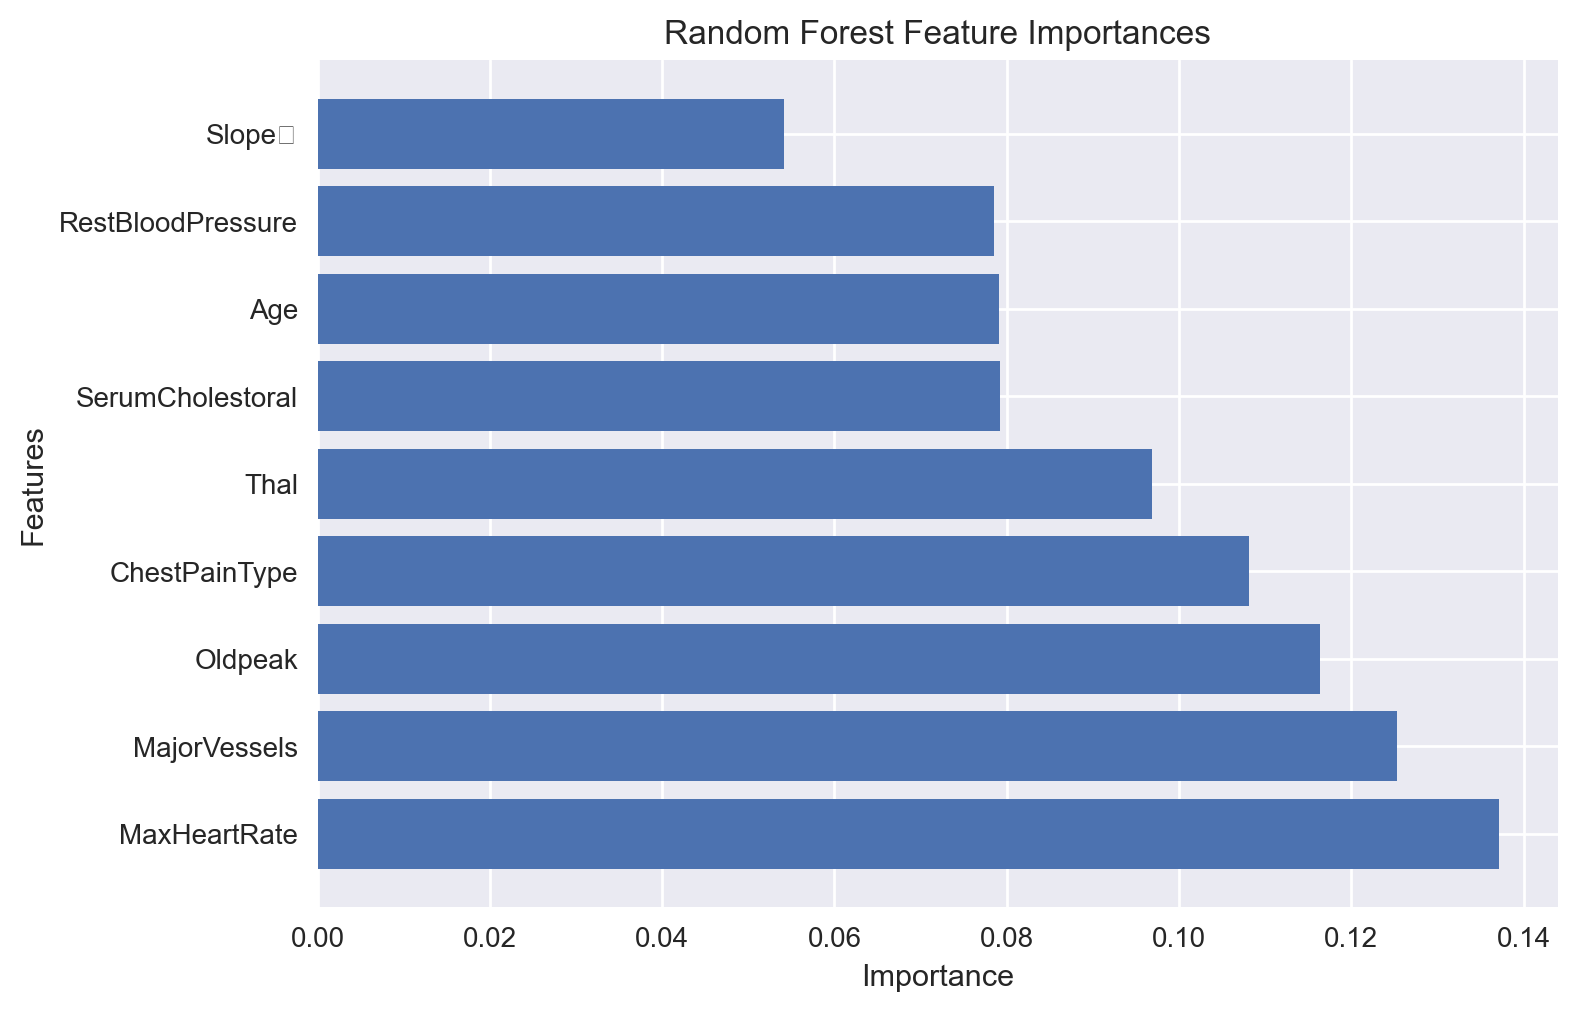

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest')

Based on the chart above, we can conclude that the 9 most important features identified by the Random Forest Importance method are `MajorVessels`, `ChestPainType`, `Thal`, `MaxHeartRate`, `Oldpeak`, `SerumCholestoral`, `RestBloodPressure`, `Age`, `Slope` respectively.

In the following code, we will test the accuracy of the Gaussian Naive Bayes classifier with the 9 selected features. We chose the Gaussian Naive Bayes algorithm because it achieved the highest accuracy among the tested classifiers. This code performs cross-validation using the Gaussian Naive Bayes classifier on the selected subset of features and computes the mean accuracy score from the cross-validation results.

In [15]:
NB_cv_results_rfi = cross_val_score(estimator=NB_classifier,
                             X=D_test[:, fs_indices_rfi],
                             y=t_test, 
                             cv=cv_method, 
                             scoring=scoring_metric)
NB_cv_results_rfi.mean().round(3)

0.832

In [16]:
print('Decision tree Classifier with Full Set of Features :', NB_cv_results_full.mean().round(3))
print('Decision tree Classifier with Selected Features    :', NB_cv_results_rfi.mean().round(3))

Decision tree Classifier with Full Set of Features : 0.826
Decision tree Classifier with Selected Features    : 0.832


> The results above demonstrate a marginal improvement in the accuracy of the Decision Tree classifier. When using the full set of features, the accuracy was **82.6%**, while it increased to **83.2%** when using the selected 9 features.

#### 2.1.2 FS Performance Comparison Technique Using Paired T-Tests: <a class="anchor" id="2.1.2"></a>


In this section, we will conduct a paired T-test to determine if there is a statistically significant difference.

The code cell below calculates the p-value for the comparison between the accuracy results of the Gaussian Naive Bayes classifier using the selected features and the full set of features.

In [17]:
print('The P-value for Gaussian Naive Bayes Classifier :',stats.ttest_rel(NB_cv_results_rfi, NB_cv_results_full).pvalue.round(3))

The P-value for Gaussian Naive Bayes Classifier : 0.816


Based on the output, the p-value for the comparison between the Gaussian Naive Bayes classifier's accuracy using selected features and the full set of features is **0.816**. A p-value close to 1 suggests that there is no statistically significant difference between the two groups. Therefore, we cannot conclude that the selected features significantly improve the classifier's performance compared to using all features.

### 2.2 Model Fitting and Tuning: <a class="anchor" id="2.2"></a>




In the Model Fitting and Tuning section, we aim to optimize the performance of the selected classifiers by tuning their hyperparameters. We will use grid search `GridSearchCV`, a technique that systematically explores different combinations of hyperparameter values, to find the best parameter settings.

#### 2.2.1 Fitting and Tuning parameters for K-Nearest Neighbors Classifier: <a class="anchor" id="2.2.1"></a>

In the following code, we use grid search to find the optimal values for the hyperparameters of the K-Nearest Neighbors (KNN) classifier. The parameters being tuned are the number of neighbors `n_neighbors` and the distance metric `p`. We create a grid of possible parameter values and perform cross-validation to evaluate the performance of each combination. The scoring metric used is the area under the ROC curve `'roc_auc'`.

In [18]:
params_KNN = {'n_neighbors': [1, 5, 6, 10, 15,16, 20, 21, 22, 24, 25], 
              'p': [1, 2, 5]}

gs_KNN  = GridSearchCV(estimator=KNeighborsClassifier(), 
                           param_grid=params_KNN, 
                           cv=cv_method,
                           scoring='roc_auc',
                           verbose=1) 
gs_KNN.fit(D_train, t_train);

Fitting 15 folds for each of 33 candidates, totalling 495 fits


In [19]:
print('The best parameters for K-Nearest Neighbors Classifier are: ',gs_KNN.best_params_)

The best parameters for K-Nearest Neighbors Classifier are:  {'n_neighbors': 25, 'p': 1}


In [20]:
print("The best score using area under the ROC curve metric is:", round(gs_KNN.best_score_,3))

The best score using area under the ROC curve metric is: 0.919


From the outputs above, we can conclude that the best parameters for the K-Nearest Neighbors classifier are `'n_neighbors': 25` and `'p': 1`, resulting in a best score of **0.919**.

In [21]:
gs_KNN.cv_results_['mean_test_score']

array([0.77089753, 0.74758987, 0.73489146, 0.88153011, 0.86530696,
       0.84922386, 0.8973331 , 0.87102591, 0.854581  , 0.90790149,
       0.88441877, 0.88281396, 0.90978641, 0.90200747, 0.89565243,
       0.9075105 , 0.9006711 , 0.89739146, 0.91314776, 0.90344888,
       0.90271359, 0.91395308, 0.90828665, 0.9046627 , 0.91669001,
       0.90618581, 0.90679855, 0.91699346, 0.91124533, 0.90448763,
       0.919176  , 0.91122199, 0.90147642])

The output above represents the mean test scores obtained during the grid search for different combinations of `n_neighbors` and `p` parameters in the K-Nearest Neighbors classifier. Each score corresponds to a specific parameter combination. Higher scores indicate better performance, and the highest score of **0.919** indicates the best-performing parameter combination.

The below code creates a DataFrame containing the parameters and mean test scores obtained during the grid search for the K-Nearest Neighbors classifier. It also adds a column indicating the distance metric used for each parameter combination.

In [22]:
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN['metric'] = results_KNN['p'].replace([1,2,5], ["Manhattan", "Euclidean", "Minkowski"])
results_KNN.nlargest(n=10, columns=['test_score']).style.highlight_max(subset = ['test_score'],color = 'lightgreen', axis = 0)

,n_neighbors,p,test_score,metric
30,25,1,0.919176,Manhattan
27,24,1,0.916993,Manhattan
24,22,1,0.916690,Manhattan
21,21,1,0.913953,Manhattan
18,20,1,0.913148,Manhattan
28,24,2,0.911245,Euclidean
31,25,2,0.911222,Euclidean
12,15,1,0.909786,Manhattan
22,21,2,0.908287,Euclidean
9,10,1,0.907901,Manhattan


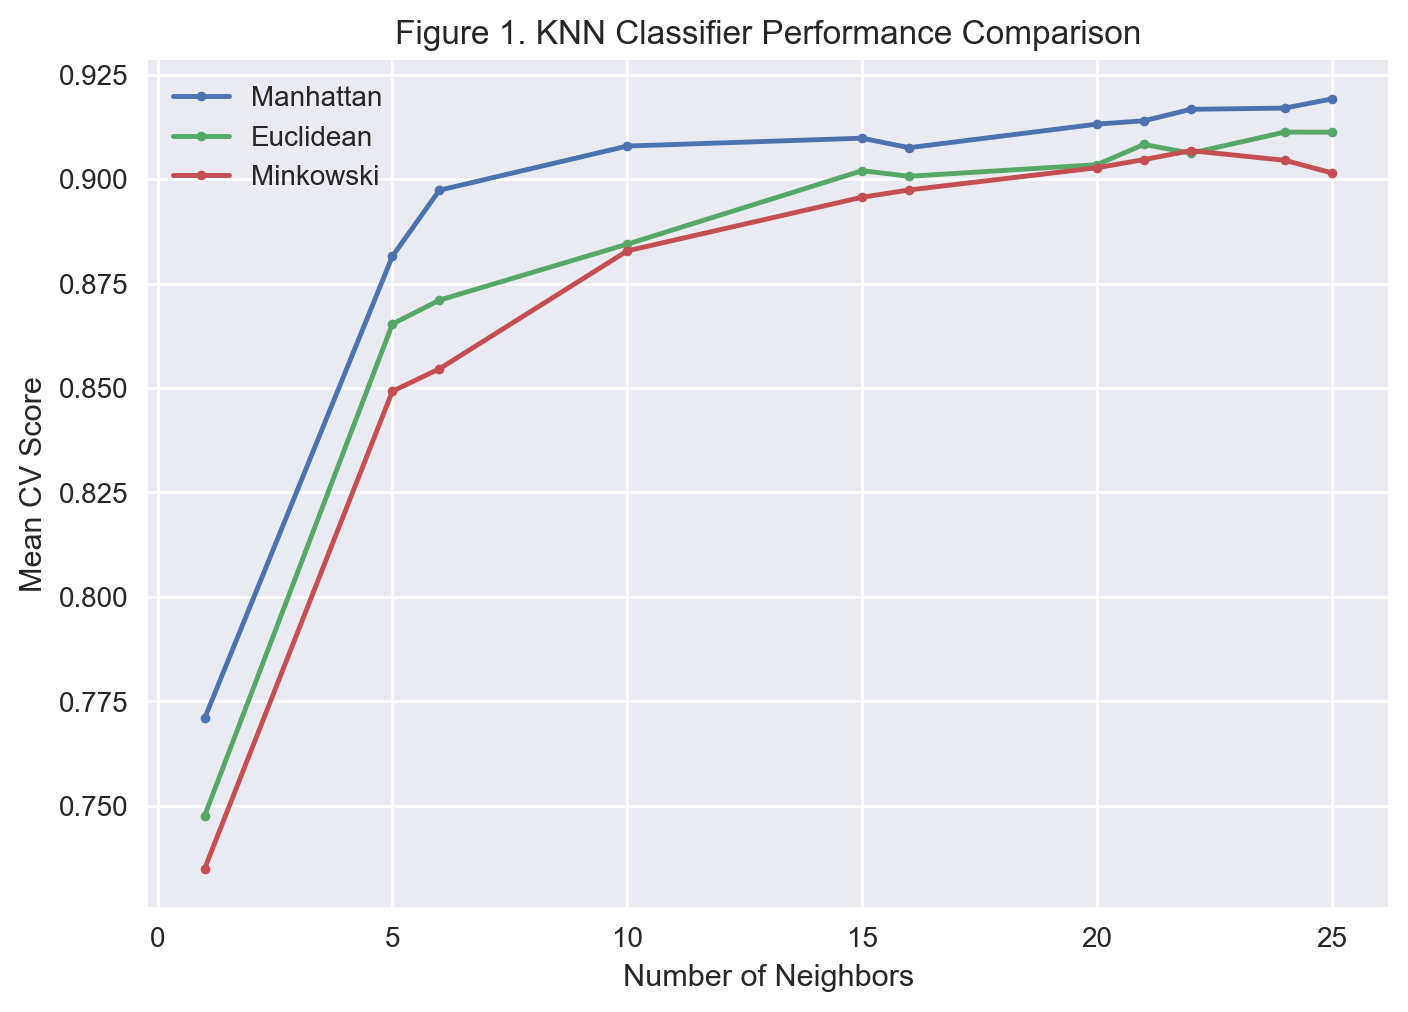

In [23]:
for i in ["Manhattan", "Euclidean", "Minkowski"]:
    temp = results_KNN[results_KNN['metric'] == i]
    plt.plot(temp['n_neighbors'], temp['test_score'], marker = '.', label = i)
    
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel("Mean CV Score")
plt.title("Figure 1. KNN Classifier Performance Comparison")
plt.show()

The above figure showcases the performance comparison of the K-Nearest Neighbors classifier using different distance metrics. Each line represents a specific metric (Manhattan, Euclidean, Minkowski) and shows how the mean cross-validation score varies with the number of neighbors. The best performing metric, Manhattan `p=1`, achieved a test score of **0.919176** with `n_neighbors` set to 25.

#### 2.2.2 Fitting and Tuning parameters for Decision Tree Classifier: <a class="anchor" id="2.2.2"></a>

In the code below, we perform grid search to identify the optimal hyperparameter values for the Decision Tree classifier. The hyperparameters being tuned are the `'criterion'` `'gini' or 'entropy'`, `'max_depth'`, and `'min_samples_split'`. A grid of possible parameter values is created, and cross-validation is used to evaluate the performance of each parameter combination. The scoring metric used to assess performance is the area under the ROC curve `'roc_auc'`.

In [24]:
params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
             'min_samples_split': [2, 3]}

gs_DT = GridSearchCV(estimator=DT_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1,
                     scoring='roc_auc')
gs_DT.fit(D_train, t_train)

Fitting 15 folds for each of 48 candidates, totalling 720 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=DecisionTreeClassifier(random_state=999),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_split': [2, 3]},
             scoring='roc_auc', verbose=1)

In [25]:
print('The best parameters for Decision Tree Classifier are: ',gs_DT.best_params_)

The best parameters for Decision Tree Classifier are:  {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2}


In [26]:
print("The best score using area under the ROC curve metric is:", round(gs_DT.best_score_,3))

The best score using area under the ROC curve metric is: 0.847


Based on the obtained outputs, it can be concluded that the Decision Tree Classifier achieves its best performance with the following parameters: `'criterion'='entropy'`, `'max_depth'=2`, and `'min_samples_split'=2`. The best score achieved using the area under the ROC curve metric is **0.847**.

In [27]:
results_DT = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT['test_score'] = gs_DT.cv_results_['mean_test_score']
results_DT.nlargest(n=10, columns=['test_score']).style.highlight_max(subset = ['test_score'],color = 'lightgreen', axis = 0)

,criterion,max_depth,min_samples_split,test_score
26,entropy,2,2,0.847106
27,entropy,2,3,0.847106
28,entropy,3,2,0.842023
29,entropy,3,3,0.842023
4,gini,3,2,0.834156
5,gini,3,3,0.834156
2,gini,2,2,0.824165
3,gini,2,3,0.824165
30,entropy,4,2,0.804908
31,entropy,4,3,0.804908


From the dataframe above, it can be observed that the best test score of **0.847** is achieved when using the hyperparameters: `'criterion'='entropy'`, `'max_depth'=2`, and `'min_samples_split'=2`. This indicates that these parameter settings lead to the highest performance of the Decision Tree Classifier based on the evaluated metric.

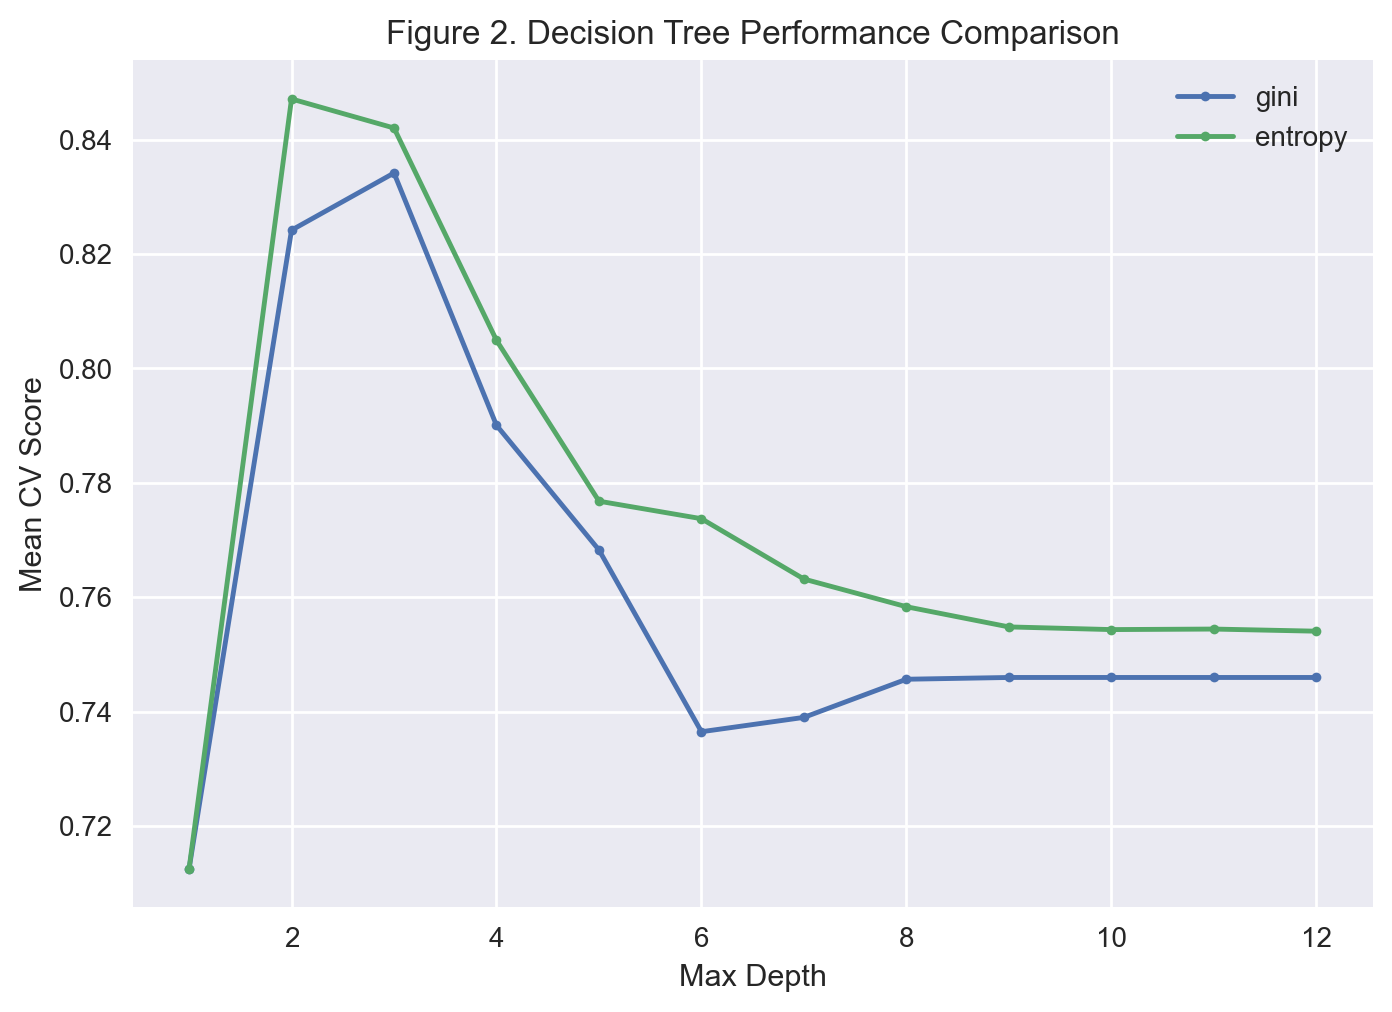

In [28]:
for i in ['gini', 'entropy']:
    temp = results_DT[results_DT['criterion'] == i]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("Figure 2. Decision Tree Performance Comparison")
plt.show()

Figure 2. above compares the mean cross-validation scores of the Decision Tree Classifier for two different criteria: `'gini'` and `'entropy'`. Each criterion is represented by a line plot with the x-axis indicating the maximum depth of the tree and the y-axis representing the mean CV score. From the graph, it can be observed that the criterion `'entropy'` consistently achieves higher mean CV scores compared to `'gini'`, indicating that `'entropy'` is a better criterion for this particular dataset. Additionally, the highest mean CV score of **0.847** is achieved when the maximum depth is 2 for `'entropy'` criteria.

#### 2.2.3 Fitting and Tuning parameters for Random Forest Classifier: <a class="anchor" id="2.2.3"></a>

In the following code, we use grid search to identify the optimal hyperparameter values for the Random Forest Classifier. Unlike the Decision Tree Classifier, the Random Forest Classifier includes additional parameters, such as the number of estimators `'n_estimators'`, which represents the number of decision trees in the forest. By specifying the values for the criterion `'gini' or 'entropy'`, `'n_estimators'`, and maximum depth `'max_depth'`, we create a grid of possible parameter combinations. Cross-validation is performed to evaluate the performance of each combination, using the area under the ROC curve `'roc_auc'` as the scoring metric.

In [29]:
params_RF = {'criterion': ['gini', 'entropy'],
             'n_estimators':[100, 250, 500],
             'max_depth': [2,5,7,10,12]}

gs_RF = GridSearchCV(estimator=rf_classifier, 
                     param_grid=params_RF, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='roc_auc')
gs_RF.fit(D_train,t_train)

Fitting 15 folds for each of 30 candidates, totalling 450 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=RandomForestClassifier(random_state=999),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 7, 10, 12],
                         'n_estimators': [100, 250, 500]},
             scoring='roc_auc', verbose=1)

In [30]:
print('The best parameters for Random Forest Classifier are: ', gs_RF.best_params_)

The best parameters for Random Forest Classifier are:  {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 250}


In [31]:
print("The best score using area under the ROC curve metric is:", round(gs_RF.best_score_,3))

The best score using area under the ROC curve metric is: 0.923


The above results indicate that the Random Forest Classifier achieves its highest performance when utilizing the hyperparameters `'criterion'='gini'`, `'max_depth'=5`, and `'n_estimators'=250` for the Random Forest Classifier. This configuration yields an impressive score of **0.923** based on the area under the ROC curve metric.

In [32]:
results_RF = pd.DataFrame(gs_RF.cv_results_['params'])
results_RF['test_score'] = gs_RF.cv_results_['mean_test_score']
results_RF.nlargest(n=10, columns=['test_score']).style.highlight_max(subset = ['test_score'],color = 'lightgreen', axis = 0)

,criterion,max_depth,n_estimators,test_score
4,gini,5,250,0.922899
19,entropy,5,250,0.922759
0,gini,2,100,0.922222
5,gini,5,500,0.921919
15,entropy,2,100,0.921837
16,entropy,2,250,0.921814
20,entropy,5,500,0.921440
18,entropy,5,100,0.921218
14,gini,12,500,0.920938
1,gini,2,250,0.920857


From the above dataframe, we can observe that the best test score obtained is **0.922899**. This highest score is achieved by employing the hyperparameters `'criterion'='gini'`, `'max_depth'=5`, and `'n_estimators'=250` in the Random Forest Classifier.

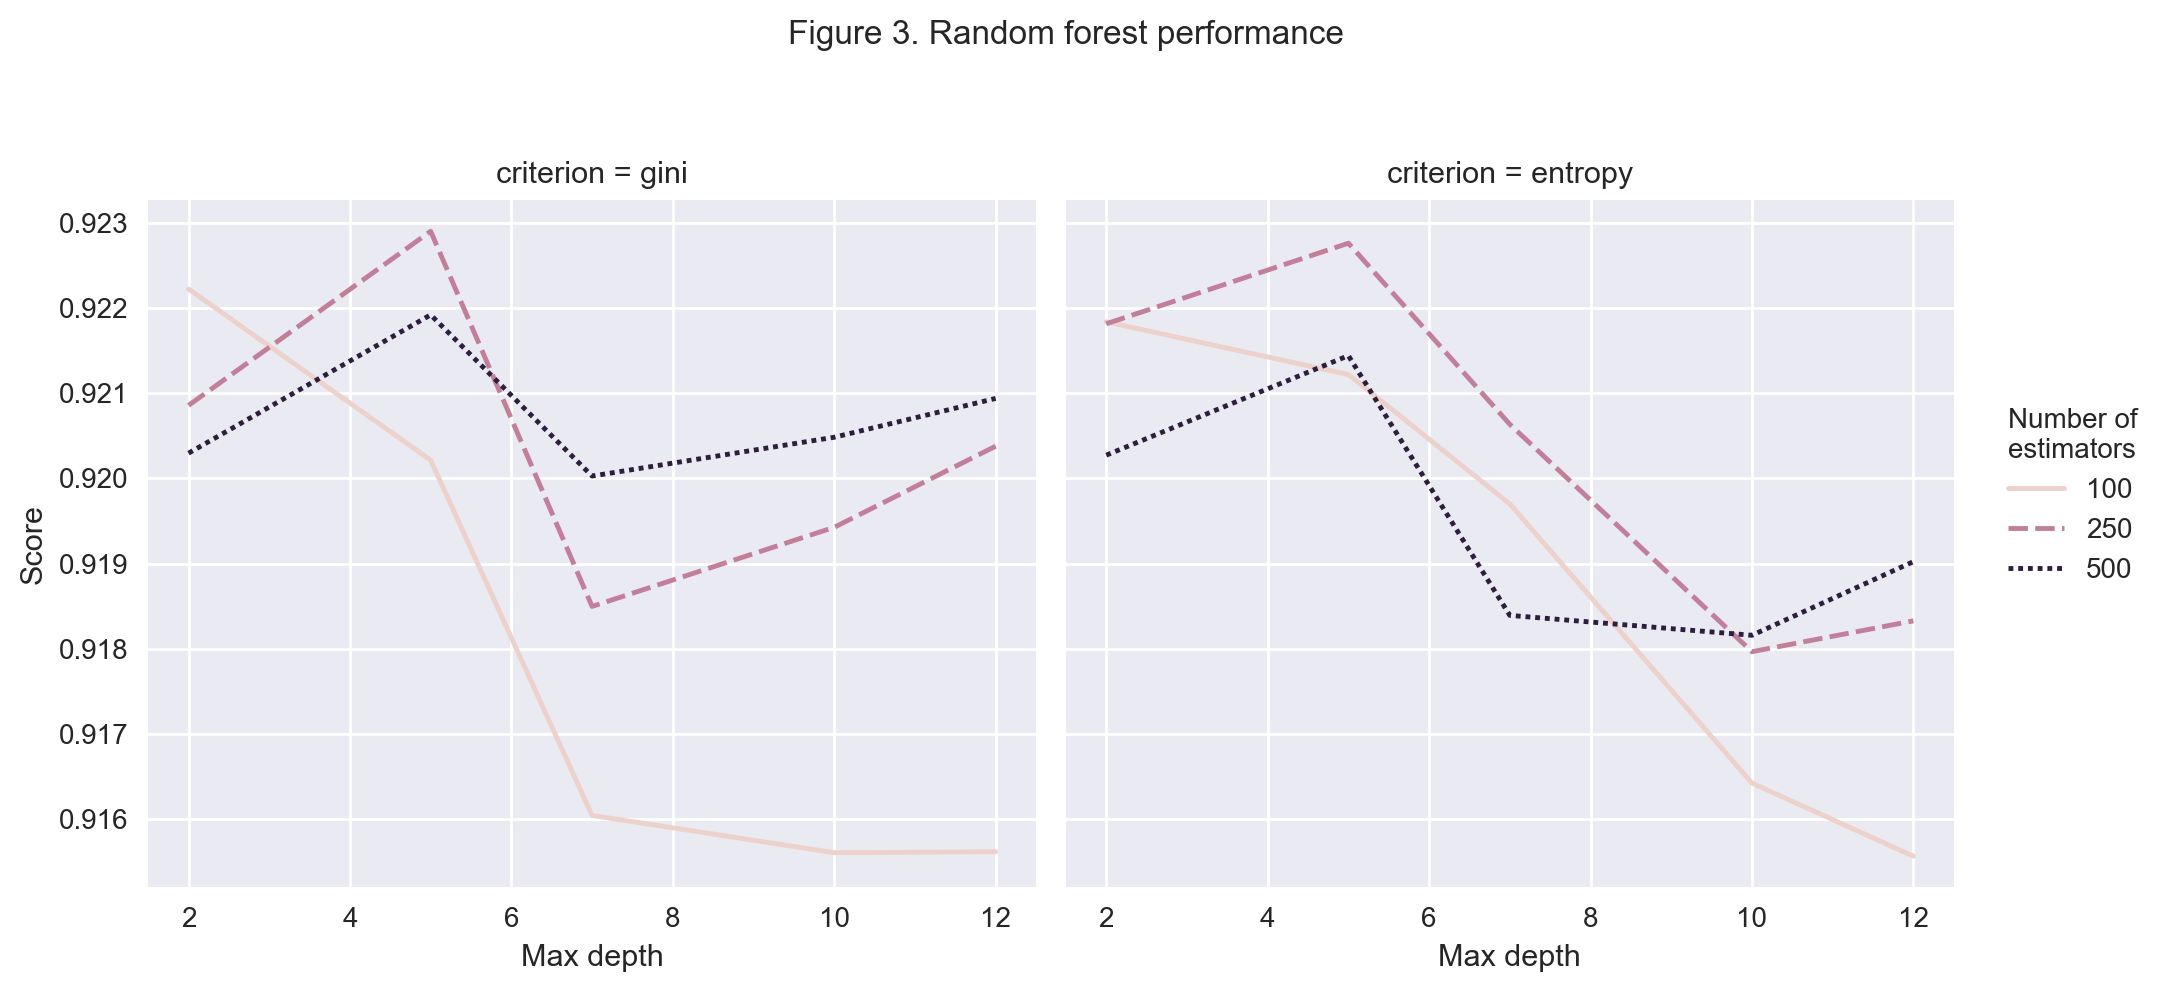

In [33]:
rel_plot=sns.relplot(data=results_RF,
            x='max_depth',
            y='test_score',
           col='criterion',
           hue='n_estimators', style="n_estimators",
           kind='line')
rel_plot.axes[0,0].set_xlabel('Max depth')
rel_plot.axes[0,1].set_xlabel('Max depth')
rel_plot.axes[0,0].set_ylabel('Score')
rel_plot._legend.set_title("Number of\nestimators")
rel_plot._legend._legend_box.align="left"
rel_plot.fig.subplots_adjust(top=0.8)
rel_plot.fig.suptitle("Figure 3. Random forest performance")
plt.show(rel_plot)

The plots in Figure 3. represent the performance comparison of the Random Forest Classifier based on different combinations of hyperparameters. The graph is divided into two columns based on the criterion used `'gini' or 'entropy'`. The plot allows us to observe the effect of changing the max depth and the number of estimators on the classifier's performance, providing insights into the optimal parameter settings. In this case, the best hyperparameters `'criterion'='gini'`, `'max_depth'=5`, and `'n_estimators'=250` which is explicitly highlighted in the plot's legend.

#### 2.2.4 Fitting and Tuning parameters for Gaussian Naive Bayes Classifier: <a class="anchor" id="2.2.4"></a>

The below code performs a grid search to tune the hyperparameter `'var_smoothing'` for the Gaussian Naive Bayes classifier, using a logarithmic range of values. It fits the grid search on the training data transformed with a `PowerTransformer`. Gaussian Naive Bayes Classifier assumes that the features follow a Gaussian (normal) distribution. By using the `PowerTransformer`, it aims to transform the data to have a more symmetric and Gaussian-like distribution, which can improve the performance of the NB classifier.

In [34]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=300)}

gs_NB = GridSearchCV(estimator=NB_classifier, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='roc_auc')

Data_transformed = PowerTransformer().fit_transform(D_train)
gs_NB.fit(Data_transformed, t_train)

Fitting 15 folds for each of 300 candidates, totalling 4500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 9.33038717e-01, 8.70561248e-01, 8.12267350e-01,
       7.57876886e-01, 7.07128478e-01, 6.59778248e-01, 6.15598650e-01,
       5.74377375e-01, 5.35916329e-01, 5.00030684e-01, 4.66547988e-01,
       4.35307336e-01, 4.06158599e-01, 3...
       4.92388263e-09, 4.59417313e-09, 4.28654141e-09, 3.99950910e-09,
       3.73169684e-09, 3.48181763e-09, 3.24867066e-09, 3.03113550e-09,
       2.82816678e-09, 2.63878910e-09, 2.46209240e-09, 2.29722754e-09,
       2.14340223e-09, 1.99987727e-09, 1.86596292e-09, 1.74101565e-09,
       1.62443501e-09, 1.51566076e-09, 1.41417017e-09, 1.31947552e-09,
       1.23112175e-09, 1.14868426e-09, 1.07176689e-09, 1.00000000e-09])},
             scoring='roc_auc', verbose=1)

In [35]:
print('The best value for var_smoothing parameter for Gaussian Naive Bayes Classifier is: ', gs_NB.best_params_)

The best value for var_smoothing parameter for Gaussian Naive Bayes Classifier is:  {'var_smoothing': 0.008977951553033322}


In [36]:
print("The best score using area under the ROC curve metric is:", round(gs_NB.best_score_,3))

The best score using area under the ROC curve metric is: 0.923


We can see from the outputs above that the best value for the `'var_smoothing'` parameter in the Gaussian Naive Bayes Classifier is 0.008977951553033322. The classifier achieves its best performance with this parameter value, resulting in a best score of **0.923** using the area under the ROC curve metric.

In [37]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']
results_NB.nlargest(n=10, columns=['test_score']).style.highlight_max(subset = ['test_score'],color = 'lightgreen', axis = 0)

,var_smoothing,test_score
68,0.008978,0.923086
69,0.008377,0.923086
70,0.007816,0.923086
71,0.007292,0.923086
72,0.006804,0.923086
73,0.006349,0.923086
43,0.050779,0.922899
44,0.047379,0.922899
56,0.020624,0.922899
57,0.019243,0.922899


It can also be observed from the above dataframe that the best test score of **0.923086** is achieved when using the `'var_smoothing'` hyperparameter value of **0.008978**. This indicates that this parameter setting leads to the highest performance of the Gaussian Naive Bayes Classifier based on the evaluated metric.

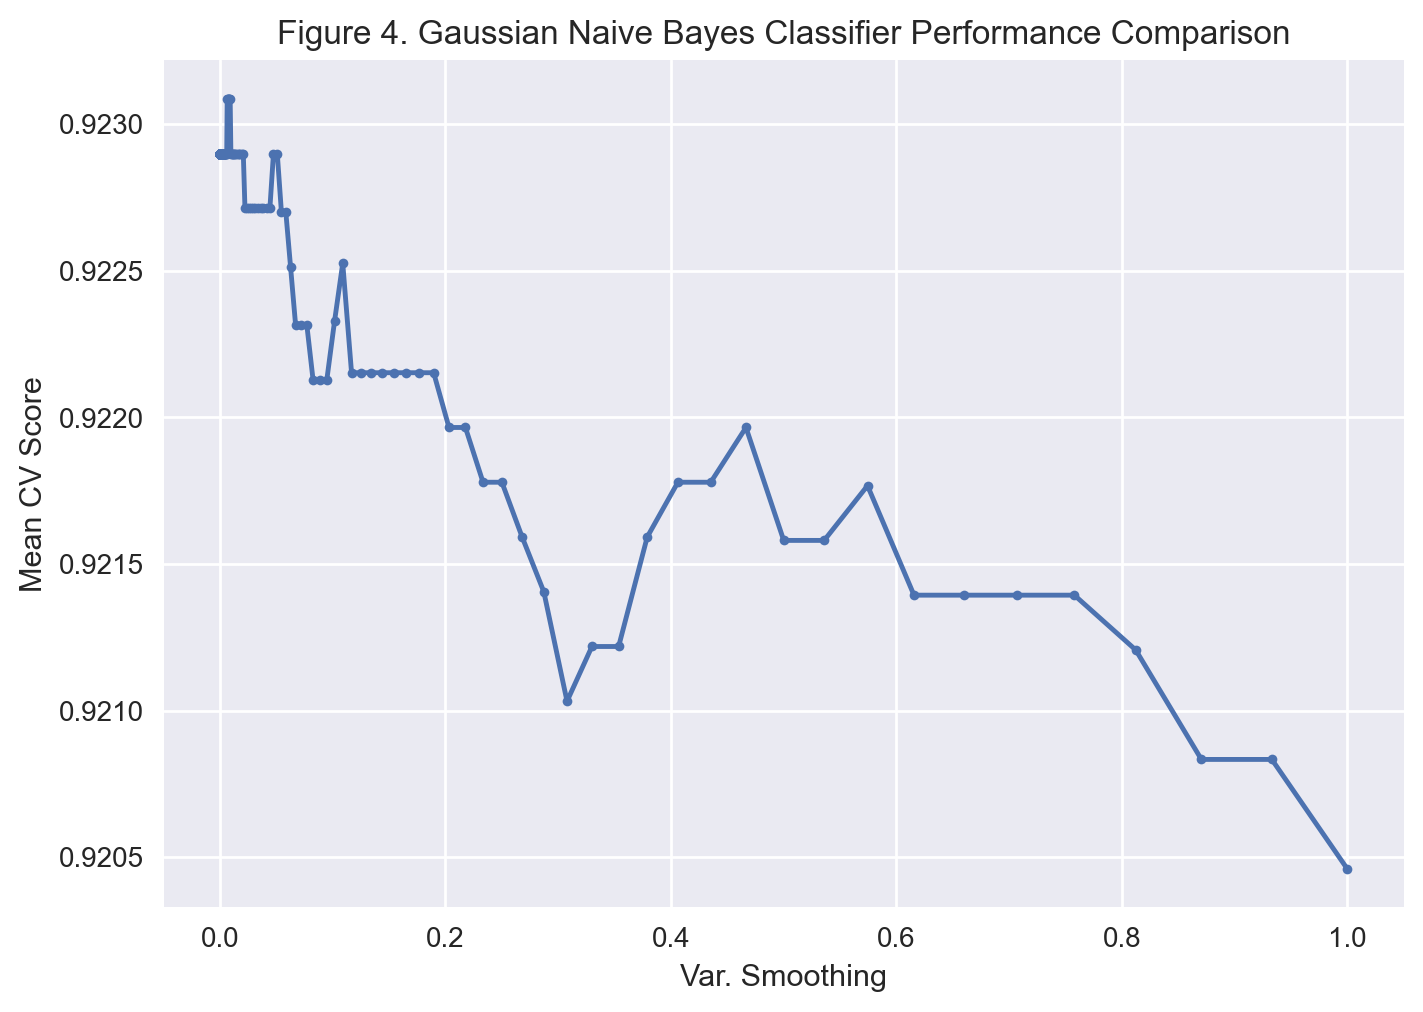

In [38]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("Figure 4. Gaussian Naive Bayes Classifier Performance Comparison")
plt.show()

Figure 4. shows the relationship between the 'var_smoothing' hyperparameter and the mean cross-validation score for the Gaussian Naive Bayes Classifier. The plot indicates that as the `'var_smoothing'` value increases, the mean CV score decreases. The highest mean CV score of **0.923086** is achieved at `'var_smoothing' = 0.008978`, which suggests that a smaller `'var_smoothing'` value leads to better performance of the Gaussian Naive Bayes Classifier based on the evaluated metric.

#### 2.2.5 Fitting and Tuning parameters for Support Vector Machine Classifier: <a class="anchor" id="2.2.5"></a>

The below code performs grid search to identify the optimal hyperparameter values for the Support Vector Machine (SVM) classifier. The hyperparameters being tuned are: `'C'`, `'kernel'`, `'gamma'`, and `'degree'`. A grid of possible parameter values is created, and cross-validation is used to evaluate the performance of each parameter combination using the area under the ROC curve `'roc_auc'` scoring metric.

In [39]:
params_svm = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],
              'degree': [2, 3, 4]}
gs_svm = GridSearchCV(estimator=svm_classifier,
                      param_grid=params_svm,
                      cv=cv_method,
                      scoring='roc_auc',
                      verbose=-1)
gs_svm.fit(D_train, t_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=SVC(C=1, kernel='linear', probability=True,
                           random_state=999),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='roc_auc', verbose=-1)

In [40]:
print('The best parameters for SVM Classifier are: ', gs_svm.best_params_)

The best parameters for SVM Classifier are:  {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [41]:
print("The best score using area under the ROC curve metric is:", round(gs_svm.best_score_,3))

The best score using area under the ROC curve metric is: 0.923


Based on the results above, it can be seen that the SVM Classifier achieves its optimal performance with the hyperparameters: `'C'` value of 100, `'degree'` of 2, `'gamma'` set to `'scale'`, and `'kernel'` type as `'linear'`. The best score obtained using the area under the ROC curve metric is **0.923**.

In [42]:
results_svm = pd.DataFrame(gs_svm.cv_results_['params'])
results_svm['test_score'] = gs_svm.cv_results_['mean_test_score']
results_svm.nlargest(n=20, columns=['test_score']).style.highlight_max(subset = ['test_score'],color = 'lightgreen', axis = 0)

,C,degree,gamma,kernel,test_score
216,100.000000,2,scale,linear,0.923459
220,100.000000,2,auto,linear,0.923459
224,100.000000,2,0.010000,linear,0.923459
228,100.000000,2,0.100000,linear,0.923459
232,100.000000,2,1,linear,0.923459
236,100.000000,2,10,linear,0.923459
240,100.000000,3,scale,linear,0.923459
244,100.000000,3,auto,linear,0.923459
248,100.000000,3,0.010000,linear,0.923459
252,100.000000,3,0.100000,linear,0.923459


It can also be observed that the highest test score of **0.923** is obtained with the following hyperparameters: `'C'` value of 100, `'degree'` of 2, `'gamma'` set to `'scale'`, and `'kernel'` type as `'linear'`. This suggests that these parameter settings yield the best performance for the SVM Classifier based on the evaluated metric.

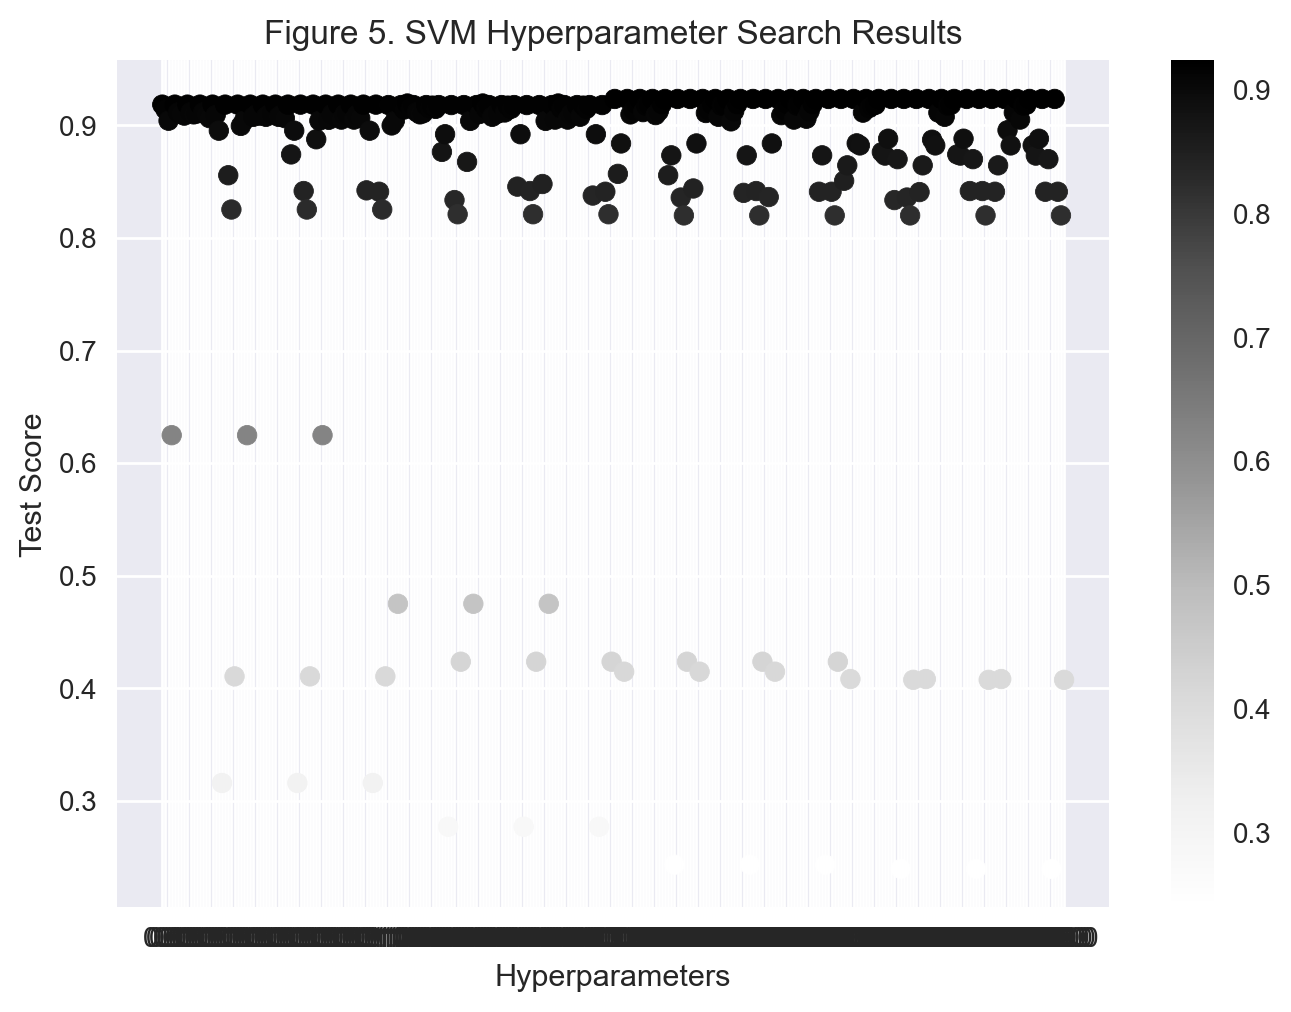

In [43]:
plt.scatter(results_svm.index, results_svm['test_score'], c=results_svm['test_score'])
plt.xticks(range(len(results_svm)), results_svm['C'])
plt.xlabel('Hyperparameters')
plt.ylabel('Test Score')
plt.title('Figure 5. SVM Hyperparameter Search Results')
plt.colorbar()
plt.show()

Figure 5. displays the test scores for different combinations of hyperparameters for the SVM classifier. Every point on the scatter plot corresponds to a particular combination of hyperparameters, with the x-axis representing the index of the hyperparameters and the y-axis indicating the corresponding test score. Additionally, most of the points on the plot are located at the top region, between the range of **0.8** and **0.9** test scores. This suggests that a majority of the tested hyperparameter combinations resulted in relatively high test scores, indicating good performance of the SVM classifier.

#### 2.2.6 Neural Network Model Fitting and Tuning: <a class="anchor" id="2.2.6"></a>

In this section, we aim to optimize the performance of the neural network model by fine-tuning its hyperparameters. We will explore the impact of at least five different hyperparameters on the model's performance and present detailed fine-tuning plots accompanied by a thorough narrative and sufficient explanation and discussion at the end. Through this process, we aim to identify the optimal hyperparameter settings that maximize the model's performance and enhance its predictive capabilities.

The following `model_factory` function was taken from the unit's tutroial **SK Part 7**. It is a function that creates a neural network model using the Keras Sequential API. The purpose of this function is to generate a neural network architecture with customizable parameters. `layer1_units` and `layer2_units` are variables that represent the number of units in the first and second hidden layers of a neural network model, respectively. The variables `layer1_activation`, `layer2_activation`, and `output_activation` represent the activation functions used in different layers of a neural network model. In addition, the variables `layer1_dropout_rate` and `layer2_dropout_rate` represent the dropout rates applied to the respective layers of the neural network, and `loss = 'binary_crossentropy'` is a specific loss function commonly used for binary classification problems. The chosen evaluation metric is `'accuracy'`.

In [44]:
loss = 'binary_crossentropy'
metrics = ['accuracy']

In [45]:
def model_factory(input_dim, layer1_units, layer2_units):
    model = Sequential()
    model.add(Dense(layer1_units, input_dim=input_dim, activation=layer1_activation))
    model.add(Dropout(layer1_dropout_rate))
    model.add(Dense(layer2_units, activation=layer1_activation))
    model.add(Dropout(layer2_dropout_rate))
    model.add(Dense(1, activation=output_activation))
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    return model

The following function `plot_history` takes a history object and a figure name as input and plots the training and validation accuracy over epochs on a graph with labeled axes. The legend indicates the train and test sets.

In [46]:
def plot_history(history, fig): 
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(fig + ' Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='lower right')
    plt.show()

#### 1st Fine-Tuned NN Model:

For the first fine-tuned neural network model, the hyperparameters will be set as follows: `epochs` is set to 500, `batch_size` is set to 100, `layer1_units` and `layer2_units` are both set to 4, `layer1_activation` and `layer2_activation` are set to `'relu'`, `output_activation` is set to `'sigmoid'`, `layer1_dropout_rate` is set to 0.05, `layer2_dropout_rate` is set to 0.00, `learning_rate` is set to 0.01, `decay` is set to 1e-6, and `momentum` is set to 0.5. These parameter values will be used to fine-tune the neural network model and optimize its performance.

In [47]:
epochs = 500
batch_size = 100

In [48]:
layer1_units = 4
layer2_units = 4
layer1_activation = 'relu'
layer2_activation = 'relu'
output_activation = 'sigmoid'
layer1_dropout_rate = 0.05
layer2_dropout_rate = 0.00
learning_rate=0.01
decay=1e-6
momentum=0.5

In [49]:
optimizer = SGD(learning_rate=learning_rate, weight_decay=decay, momentum=momentum)

In [50]:
model_test = model_factory(Data.shape[1], layer1_units, layer2_units)
model_test.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 56        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [51]:
%%time
history_test = model_test.fit(D_train, 
                              t_train,
                              epochs=epochs,
                              batch_size=batch_size,
                              verbose=0,
                              shuffle=True,
                              validation_data=(D_test, t_test))

Wall time: 10.9 s


In [52]:
history_test.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

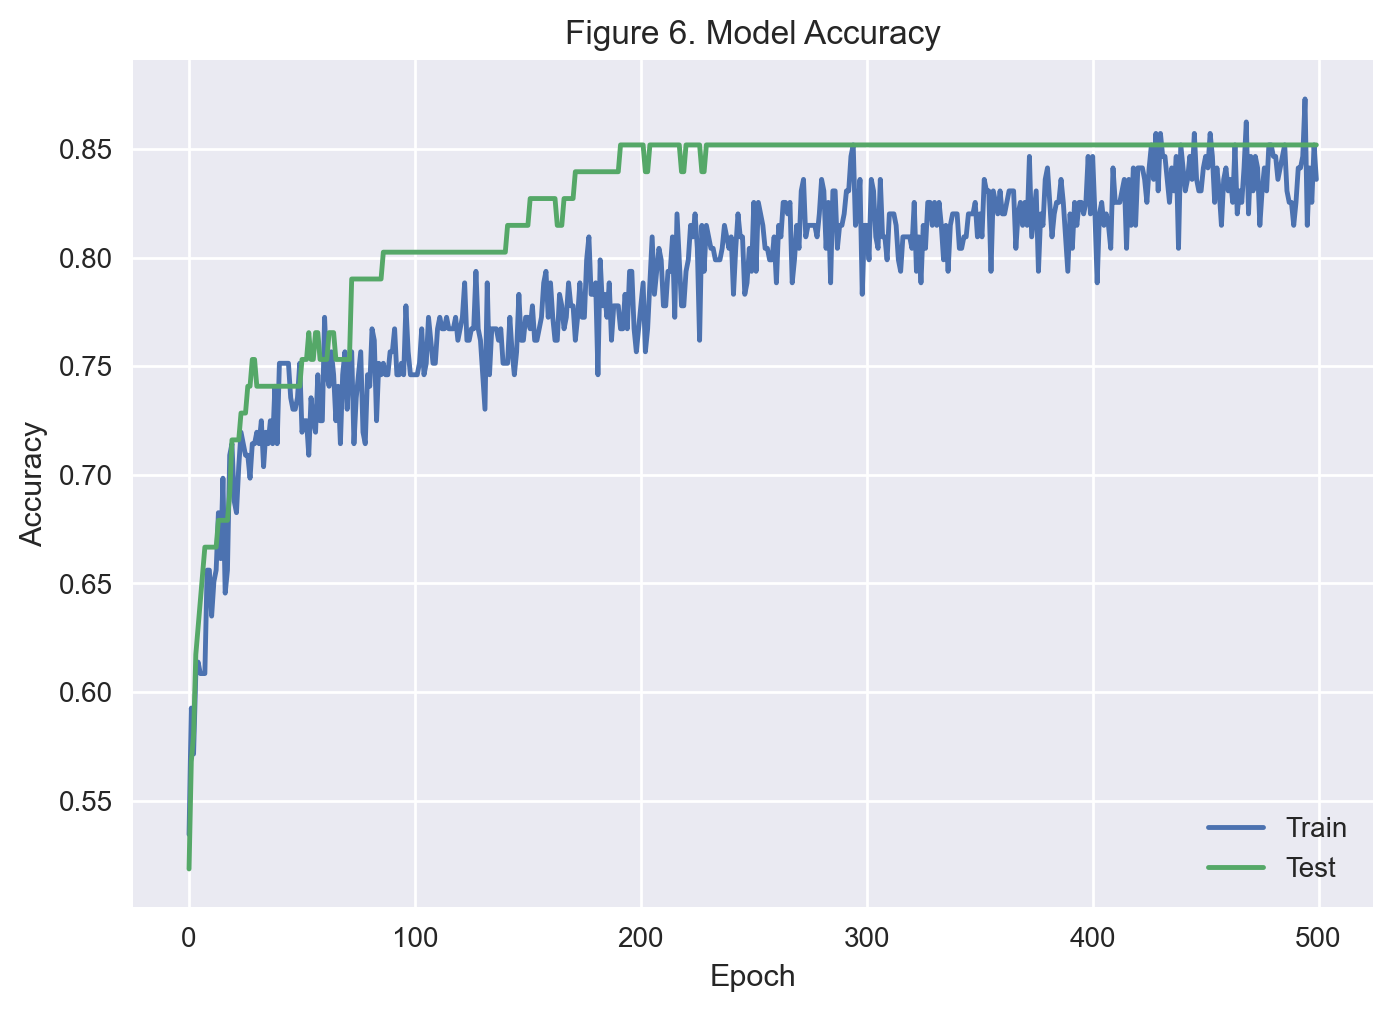

In [53]:
plot_history(history_test, 'Figure 6.')

Figure 6 displays the performance of the first NN model in terms of accuracy over multiple epochs. The accuracy score for this model is **0.852**, indicating that it predicts correctly around **85.2%** of the time. The ROC AUC score, measuring the model's ability to distinguish between classes, is **0.847**. The graph shows the accuracy values on the y-axis, ranging from **0.55** to higher values. As the epochs progress, the accuracy values exhibit fluctuations, indicating the model's learning process.

In [54]:
model_output = model_test.predict(D_test).astype(float)

t_pred = np.where(model_output < 0.5, 0, 1)

result_test = pd.DataFrame()
result_test['target'] = t_test.flatten()
result_test['fit'] = t_pred

result_test.head()

3/3 [==============================] - 0s 0s/step


,target,fit
0,1.0,1
1,0.0,0
2,0.0,0
3,1.0,1
4,1.0,1


In [55]:
acc = accuracy_score(result_test['target'], result_test['fit'])
auc = roc_auc_score(result_test['target'], result_test['fit'])
print(f"validation data accuracy_score = {acc:.3f}")
print(f"validation data roc_auc_score = {auc:.3f}")

validation data accuracy_score = 0.852
validation data roc_auc_score = 0.847


#### 2nd Fine-Tuned NN Model:

To optimize the performance of the second fine-tuned neural network model, the hyperparameters will be adjusted as follows: the number of `epochs` will be increased to 700, the `batch_size` will be adjusted to 150, both `layer1_units` and `layer2_units` will be set to 6, the activation functions for the first and second layers, `layer1_activation` and `layer2_activation`, will be changed to `'sigmoid'`, and the `output_activation` will remain as `'sigmoid'`. Additionally, the dropout rates will be modified, with `layer1_dropout_rate` set to 0.10 and `layer2_dropout_rate` set to 0.00. The learning rate will be adjusted to 0.05, the `decay` will remain at 1e-6, and the `momentum` will be reduced to 0.1. By fine-tuning these hyperparameters, we aim to enhance the performance of the neural network model further.

In [56]:
epochs = 700
batch_size = 150

In [57]:
layer1_units = 6
layer2_units = 6
layer1_activation = 'sigmoid'
layer2_activation = 'sigmoid'
output_activation = 'sigmoid'
layer1_dropout_rate = 0.10
layer2_dropout_rate = 0.00
learning_rate=0.05
decay=1e-6
momentum=0.1

In [58]:
optimizer = SGD(learning_rate=learning_rate, weight_decay=decay, momentum=momentum)

In [59]:
model_test = model_factory(Data.shape[1], layer1_units, layer2_units)
model_test.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 84        
                                                                 
 dropout_2 (Dropout)         (None, 6)                 0         
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dropout_3 (Dropout)         (None, 6)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [60]:
%%time
history_test = model_test.fit(D_train, 
                              t_train,
                              epochs=epochs,
                              batch_size=batch_size,
                              verbose=0,
                              shuffle=True,
                              validation_data=(D_test, t_test))

Wall time: 14.9 s


In [61]:
history_test.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

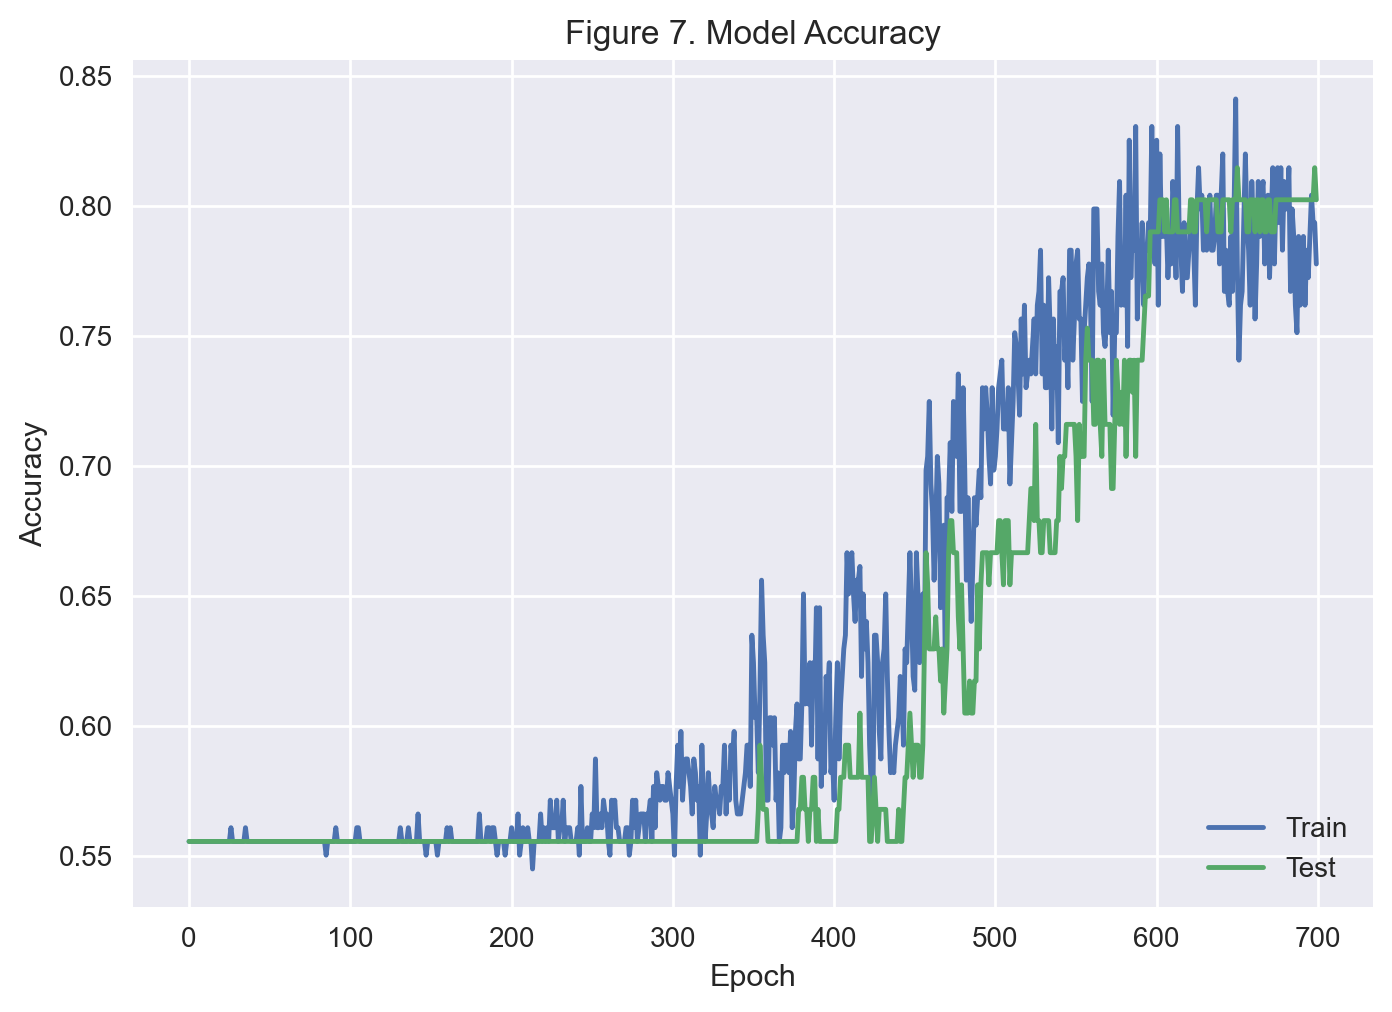

In [62]:
plot_history(history_test, 'Figure 7.')

Figure 7 shows a line graph of the second NN model performance. The accuracy score for this model is **0.802**, indicating that it achieves an accuracy of approximately **80.2%**. The ROC AUC score, which measures the model's ability to discriminate between classes, is **0.789**. It's important to note that the accuracy score for this model decreased slightly compared to the previous model.

In [63]:
model_output = model_test.predict(D_test).astype(float)

t_pred = np.where(model_output < 0.5, 0, 1)

result_test = pd.DataFrame()
result_test['target'] = t_test.flatten()
result_test['fit'] = t_pred

result_test.head()

3/3 [==============================] - 0s 998us/step


,target,fit
0,1.0,1
1,0.0,0
2,0.0,0
3,1.0,1
4,1.0,1


In [64]:
acc = accuracy_score(result_test['target'], result_test['fit'])
auc = roc_auc_score(result_test['target'], result_test['fit'])
print(f"validation data accuracy_score = {acc:.3f}")
print(f"validation data roc_auc_score = {auc:.3f}")

validation data accuracy_score = 0.802
validation data roc_auc_score = 0.789


#### 3rd Fine-Tuned NN Model:

To further fine-tune the performance of the third neural network model, the hyperparameters will be adjusted as follows: the number of `epochs` will be reduced to 200, maintaining a `batch_size` of 100. Both `layer1_units` and `layer2_units` will be increased to 8, utilizing the `'relu'` activation function for both `layer1_activation` and `layer2_activation`, while keeping the `output_activation` as `'sigmoid'`. The dropout rates will be increased, setting `layer1_dropout_rate` and `layer2_dropout_rate` to 0.2. The `learning_rate` will be reduced to 0.001, `decay` will be adjusted to 1e-4, and `momentum` will be set to 0.9. By fine-tuning these hyperparameters, the neural network model aims to optimize its performance even further.

In [65]:
epochs = 200
batch_size = 100

In [66]:
layer1_units = 8
layer2_units = 8
layer1_activation = 'relu'
layer2_activation = 'relu'
output_activation = 'sigmoid'
layer1_dropout_rate = 0.2
layer2_dropout_rate = 0.2
learning_rate=0.001
decay=1e-4
momentum=0.9

In [67]:
optimizer = SGD(learning_rate=learning_rate, weight_decay=decay, momentum=momentum)

In [68]:
model_test = model_factory(Data.shape[1], layer1_units, layer2_units)
model_test.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 112       
                                                                 
 dropout_4 (Dropout)         (None, 8)                 0         
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [69]:
%%time
history_test = model_test.fit(D_train, 
                              t_train,
                              epochs=epochs,
                              batch_size=batch_size,
                              verbose=0,
                              shuffle=True,
                              validation_data=(D_test, t_test))

Wall time: 4.69 s


In [70]:
history_test.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

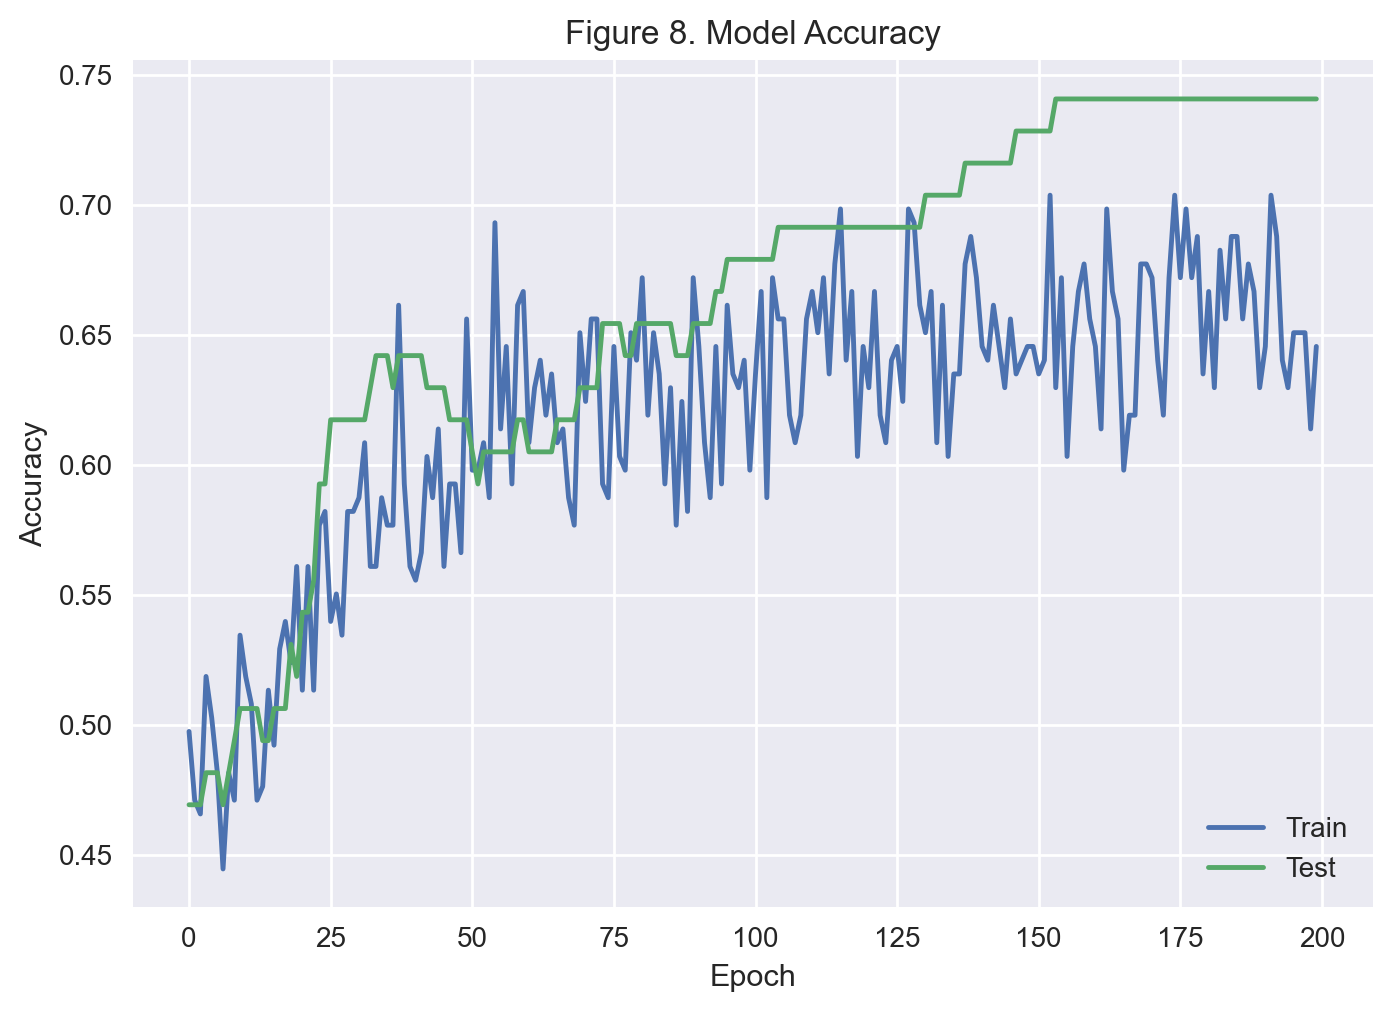

In [71]:
plot_history(history_test, 'Figure 8.')

Figure 8 shows the performance of the third NN model with an accuracy score of **0.741** and a ROC AUC score of **0.725**. The 'Test' line shows a steady increase in accuracy, surpassing **0.70**, indicating the model's ability to generalize well. The 'Train' line exhibits fluctuations but remains below **0.70**. Overall, this model demonstrates moderate predictive capabilities and generalization to unseen data. However, the training line is consistently higher than the test line, indicating potential overfitting of the model.

In [72]:
model_output = model_test.predict(D_test).astype(float)

t_pred = np.where(model_output < 0.5, 0, 1)

result_test = pd.DataFrame()
result_test['target'] = t_test.flatten()
result_test['fit'] = t_pred

result_test.head()

3/3 [==============================] - 0s 997us/step


,target,fit
0,1.0,1
1,0.0,0
2,0.0,0
3,1.0,0
4,1.0,0


In [73]:
acc = accuracy_score(result_test['target'], result_test['fit'])
auc = roc_auc_score(result_test['target'], result_test['fit'])
print(f"validation data accuracy_score = {acc:.3f}")
print(f"validation data roc_auc_score = {auc:.3f}")

validation data accuracy_score = 0.741
validation data roc_auc_score = 0.725


#### 4th Fine-Tuned NN Model:

To further fine-tune the performance of the fourth neural network model, the hyperparameter `epochs` will be increased back to 500, while keeping the rest of the parameters the same as in the previous model.

In [74]:
epochs = 500
batch_size = 100

In [75]:
layer1_units = 8
layer2_units = 8
layer1_activation = 'relu'
layer2_activation = 'relu'
output_activation = 'sigmoid'
layer1_dropout_rate = 0.2
layer2_dropout_rate = 0.2
learning_rate=0.001
decay=1e-4
momentum=0.9

In [76]:
optimizer = SGD(learning_rate=learning_rate, weight_decay=decay, momentum=momentum)

In [77]:
model_test = model_factory(Data.shape[1], layer1_units, layer2_units)
model_test.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 112       
                                                                 
 dropout_6 (Dropout)         (None, 8)                 0         
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dropout_7 (Dropout)         (None, 8)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [78]:
%%time
history_test = model_test.fit(D_train, 
                              t_train,
                              epochs=epochs,
                              batch_size=batch_size,
                              verbose=0, # set to 1 for iteration details, 0 for no details
                              shuffle=True,
                              validation_data=(D_test, t_test))

Wall time: 10.9 s


In [79]:
history_test.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

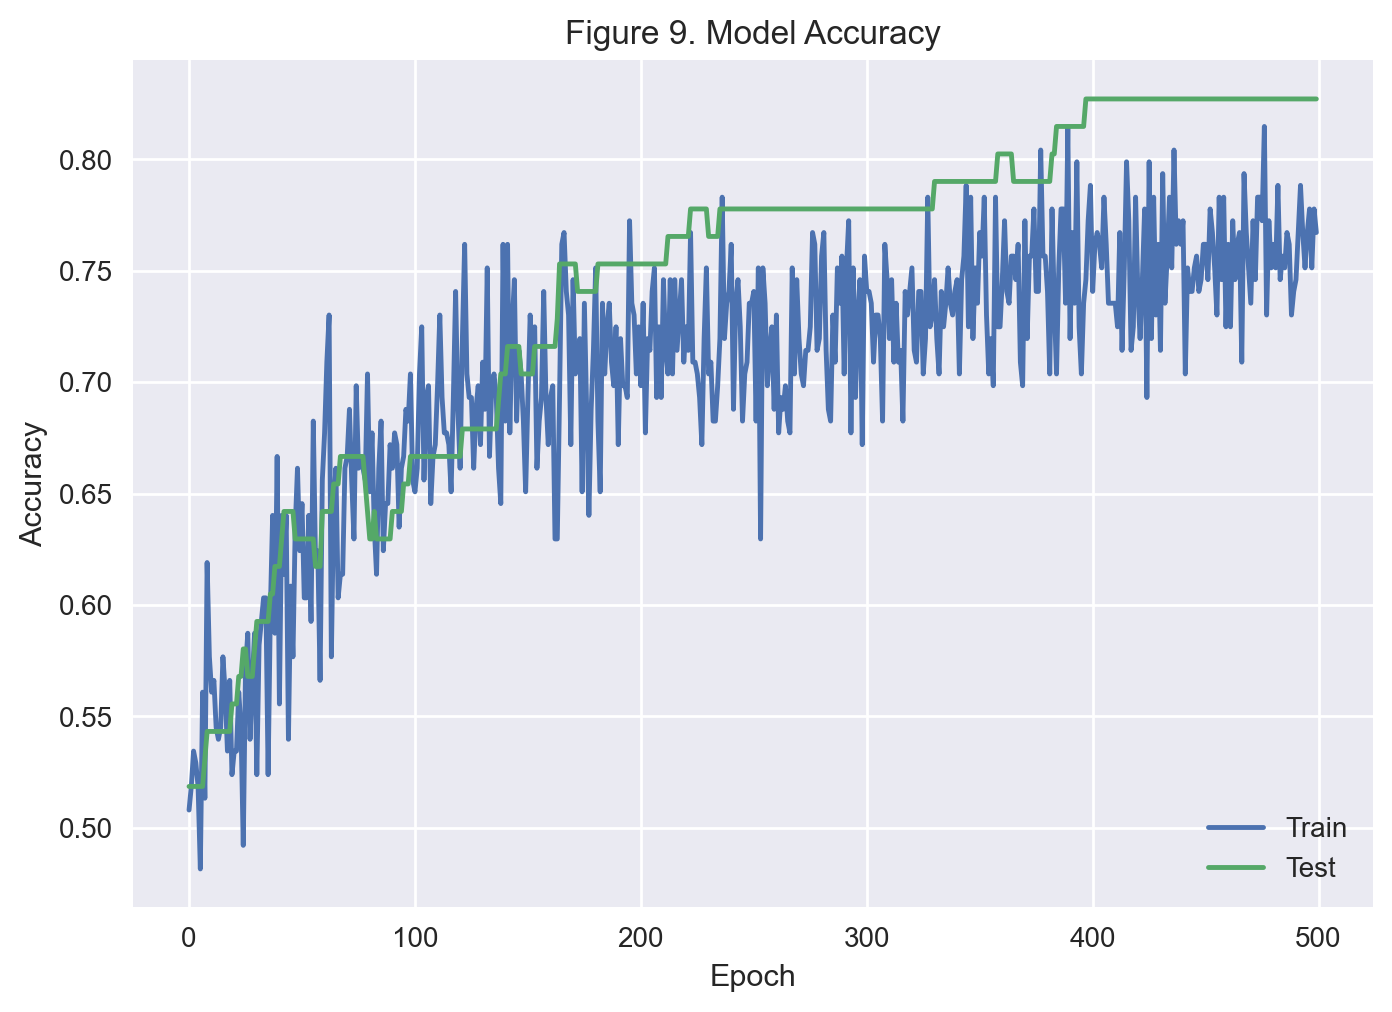

In [80]:
plot_history(history_test, 'Figure 9.')

Figure 9 displays the performance of the fourth NN model. It achieved an accuracy score of **0.827** and a ROC AUC score of **0.819**. The line representing the model's performance on the training data shows ups and downs but stays mostly above **0.70**. The line for the model's performance on the test data increases steadily with some sharp turns and reaches above **0.80**.

In [81]:
model_output = model_test.predict(D_test).astype(float)

t_pred = np.where(model_output < 0.5, 0, 1)

result_test = pd.DataFrame()
result_test['target'] = t_test.flatten()
result_test['fit'] = t_pred

result_test.head()

3/3 [==============================] - 0s 2ms/step


,target,fit
0,1.0,1
1,0.0,0
2,0.0,0
3,1.0,1
4,1.0,1


In [82]:
acc = accuracy_score(result_test['target'], result_test['fit'])
auc = roc_auc_score(result_test['target'], result_test['fit'])
print(f"validation data accuracy_score = {acc:.3f}")
print(f"validation data roc_auc_score = {auc:.3f}")

validation data accuracy_score = 0.827
validation data roc_auc_score = 0.819


#### 5th Fine-Tuned NN Model:

To further enhance the performance of the neural network model, the hyperparameters will be adjusted for the fifth and final model. While some parameters remain the same, there are a few notable changes. The `epochs` will be reduced to 400, maintaining the `batch_size` of 100. Additionally, both `layer1_units` and `layer2_units` will be increased to 10, continuing to use the `'relu'` activation function for both layers. The `layer1_dropout_rate` will be set to 0.05, and the `layer2_dropout_rate` will be set to 0.00. Both `learning_rate` and `decay` will remain the same. The `momentum` will be decreased to 0.5.

In [83]:
epochs = 400
batch_size = 100

In [84]:
layer1_units = 10
layer2_units = 10
layer1_activation = 'relu'
layer2_activation = 'relu'
output_activation = 'sigmoid'
layer1_dropout_rate = 0.05
layer2_dropout_rate = 0.00
learning_rate=0.01
decay=1e-4
momentum=0.5

In [85]:
optimizer = SGD(learning_rate=learning_rate, weight_decay=decay, momentum=momentum)

In [86]:
model_test = model_factory(Data.shape[1], layer1_units, layer2_units)
model_test.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                140       
                                                                 
 dropout_8 (Dropout)         (None, 10)                0         
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dropout_9 (Dropout)         (None, 10)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [87]:
%%time
history_test = model_test.fit(D_train, 
                              t_train,
                              epochs=epochs,
                              batch_size=batch_size,
                              verbose=0,
                              shuffle=True,
                              validation_data=(D_test, t_test))

Wall time: 8.75 s


In [88]:
history_test.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

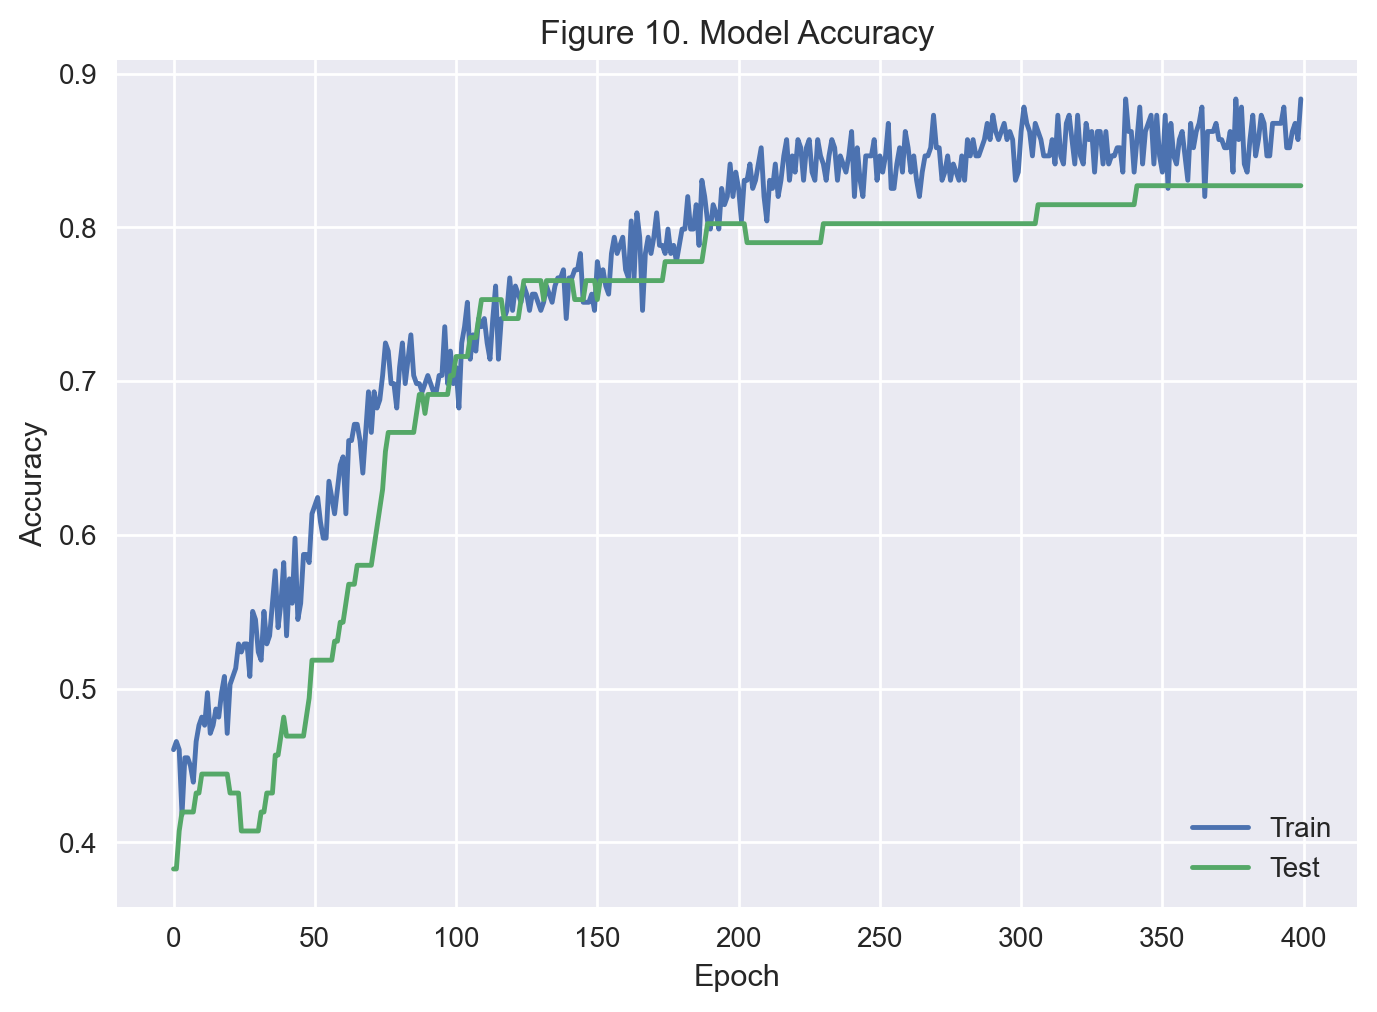

In [89]:
plot_history(history_test, 'Figure 10.')

In Figure 10, we can see the performance of the fifth NN model. It achieved an accuracy score of **0.827** and a ROC AUC score of **0.822**. The line representing the model's performance on the test data starts below **0.4** and steadily increases, reaching above **0.8**.

In [90]:
model_output = model_test.predict(D_test).astype(float)

t_pred = np.where(model_output < 0.5, 0, 1)

result_test = pd.DataFrame()
result_test['target'] = t_test.flatten()
result_test['fit'] = t_pred

result_test.head()

3/3 [==============================] - 0s 985us/step


,target,fit
0,1.0,1
1,0.0,0
2,0.0,0
3,1.0,1
4,1.0,1


In [91]:
acc = accuracy_score(result_test['target'], result_test['fit'])
auc = roc_auc_score(result_test['target'], result_test['fit'])
print(f"validation data accuracy_score = {acc:.3f}")
print(f"validation data roc_auc_score = {auc:.3f}")

validation data accuracy_score = 0.827
validation data roc_auc_score = 0.822


#### Discussion

In this discussion, We will analyse and evaluate the performance of the five fine-tuned hyperparameters for a neural network (NN) model for heart disease prediction. The purpose is to offer a thorough understanding of the NN models, including their topology and essential parameter values. The validation data accuracy score and ROC AUC score will be used to evaluate the models.

The first fine-tuned NN model is trained for 500 epochs with a batch size of 100. It consists of two hidden layers with four units each, utilizing the ReLU activation function. The output layer employs the sigmoid activation function. The model achieves an accuracy score of **0.852** and a ROC AUC score of **0.847** on the validation data.

For the second model, the number of epochs is increased to 700, and the batch size is set to 150. The hidden layers now have six units each, with the activation function switched to sigmoid. The dropout rate for the first hidden layer is 0.10. However, this model demonstrates decreased performance, with an accuracy score of **0.802** and a ROC AUC score of **0.789** on the validation data.

The third model reduces the number of epochs to 200 and the batch size to 100. The hidden layers are expanded to have eight units each, utilizing the ReLU activation function. It achieves an accuracy score of **0.741** and a ROC AUC score of **0.725** on the validation data.

In the fourth model, we modify some hyperparameters while keeping the number of epochs at 500. However, this results in a slight decrease in performance, with an accuracy score of **0.827** and a ROC AUC score of **0.819** on the validation data.

Finally, the fifth and final model introduces adjustments to several parameters. It has 400 epochs, a batch size of 100, and ten units in both hidden layers with ReLU activation. The model achieves improved performance, with an accuracy score of **0.827** and a ROC AUC score of **0.822** on the validation data.

Overall, we observe varying performance among the five fine-tuned NN models. The first model exhibit the highest accuracy and ROC AUC score, while the second and third models show the lowest performance. The fourth model, with modifications to the hyperparameters, performs similarly to the fifth model. These findings highlight the sensitivity of NN models to different parameter configurations, emphasizing the need for careful fine-tuning to achieve optimal results in predicting heart disease.

### 2.3 Model Comparison:  <a class="anchor" id="2.3"></a>

In this part, we want to thoroughly examine how well different algorithms perform in our study. We will compare them using different measures like cross-validation, classification reports, Confusion Matrices, and AUC (Area Under the Curve). We will also use paired t-tests to see if any differences between the algorithms are statistically important. By comparing the models in detail, we can learn about their strengths and weaknesses and decide which ones are best suited for predicting heart disease.

#### 2.3.1 Comparing the classefiers by Cross validation using Paired T-Tests:  <a class="anchor" id="2.3.1"></a>

In [92]:
cv_method_ttest = cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                     n_repeats=3,
                                    random_state=111)
# KNN model
cv_results_KNN = cross_val_score(estimator=gs_KNN.best_estimator_,
                                 X=D_test,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=1,
                                 scoring='roc_auc')
cv_results_KNN.mean()

0.8643518518518519

The above code performs a cross-validation using the KNN model and calculates the mean roc_auc score. The result is **0.864**, indicating a relatively high average performance of the KNN model in predicting heart disease.

In [93]:
# DT model
cv_results_DT = cross_val_score(estimator=gs_DT.best_estimator_,
                                 X=D_test,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=1,
                                  scoring='roc_auc')
cv_results_DT.mean()

0.7873677248677249

The result of cross-validation using the Decision Tree model is **0.787**, indicating a moderate average performance of the DT model in heart disease prediction.

In [94]:
# RF model
cv_results_RF = cross_val_score(estimator=gs_RF.best_estimator_,
                                 X=D_test,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=1,
                                scoring='roc_auc')
cv_results_RF.mean()

0.8648148148148149

The result of cross-validation using the Random Forest model is **0.865**, indicating a strong average performance of the RF model in heart disease prediction.

In [95]:
# NB model
Data_sample_test_transformed = PowerTransformer().fit_transform(D_test)
cv_results_NB = cross_val_score(estimator=gs_NB.best_estimator_,
                                 X=Data_sample_test_transformed,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=1,
                                  scoring='roc_auc')
cv_results_NB.mean()

0.885978835978836

The Gaussian Naive Bayes model achieved an average performance of **0.886** in heart disease prediction, indicating strong predictive capabilities. This performance is slightly higher than the previous Random Forest model.

In [96]:
# SVM model
cv_results_svm = cross_val_score(estimator=gs_svm.best_estimator_,
                                 X=D_test,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=1,
                                scoring='roc_auc')
cv_results_svm.mean()

0.8193121693121694

The Support Vector Machine (SVM) classifier achieved an average performance of **0.819** in heart disease prediction, indicating moderate predictive capabilities. Although the performance is lower compared to the Gaussian Naive Bayes classifier **0.886**, SVM still demonstrates its potential as a viable algorithm for heart disease classification. The NB classifier stands out as the most effective algorithm for heart disease classification based on the evaluation metric used so far.

In [97]:
print(stats.ttest_rel(cv_results_KNN, cv_results_NB))
print(stats.ttest_rel(cv_results_KNN, cv_results_DT))
print(stats.ttest_rel(cv_results_KNN, cv_results_RF))
print(stats.ttest_rel(cv_results_KNN, cv_results_svm))
print(stats.ttest_rel(cv_results_DT, cv_results_NB))
print(stats.ttest_rel(cv_results_DT, cv_results_RF))
print(stats.ttest_rel(cv_results_DT, cv_results_svm))
print(stats.ttest_rel(cv_results_RF, cv_results_NB))
print(stats.ttest_rel(cv_results_RF, cv_results_svm))

Ttest_relResult(statistic=-2.3794924450989186, pvalue=0.03210428433943712)
Ttest_relResult(statistic=3.515470540955114, pvalue=0.003428183108250885)
Ttest_relResult(statistic=-0.03799493183626809, pvalue=0.9702282004432601)
Ttest_relResult(statistic=2.416991660863906, pvalue=0.02987975156076082)
Ttest_relResult(statistic=-5.086773780867186, pvalue=0.00016568291997342316)
Ttest_relResult(statistic=-3.984986017333487, pvalue=0.001355383860336997)
Ttest_relResult(statistic=-0.9473390550583012, pvalue=0.35953209480151727)
Ttest_relResult(statistic=-2.0460759563850037, pvalue=0.060010257046549095)
Ttest_relResult(statistic=2.6865163484084587, pvalue=0.017718202290411256)


From the obtained results, we can conclude that the p-values of the paired t-tests indicate significant differences between the algorithms. When considering an alpha level below 0.05, the most significant difference is observed with the Naive Bayes (NB) classifier **(p-value = 0.00016)**. This suggests that the NB classifier exhibits a statistically significant variation in performance compared to the other classifiers, making it the most distinctive algorithm in this evaluation.

#### 2.3.2 Comparing the classefiers using the classification reports: <a class="anchor" id="2.3.2"></a>

In [100]:
pred_KNN = gs_KNN.predict(D_test)
pred_DT = gs_DT.predict(D_test)
pred_RF = gs_RF.predict(D_test)
pred_NB = gs_NB.predict(Data_sample_test_transformed)
pred_SVM = gs_svm.predict(D_test)

In [101]:
from sklearn import  metrics
print("\nClassification report for k-nearest neighbors Classifier") 
print(metrics.classification_report(t_test, pred_KNN))
print("\033[1m" + "Accuracy for K-nearest neighbors classifier is "+ "\033[0m",round(cv_results_KNN.mean(),3))


Classification report for k-nearest neighbors Classifier
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84        45
         1.0       0.82      0.75      0.78        36

    accuracy                           0.81        81
   macro avg       0.82      0.81      0.81        81
weighted avg       0.82      0.81      0.81        81

Accuracy for K-nearest neighbors classifier is  0.864


The classification report for the k-nearest neighbors (KNN) classifier reveals an accuracy of **0.864**. For class **0**, which represents the absence of heart disease, the precision is **0.81**, recall is **0.87**, and f1-score is **0.84**. For class **1**, indicating the presence of heart disease, the precision is **0.82**, recall is **0.75**, and f1-score is **0.78**. These metrics indicate a reasonably balanced performance of the KNN classifier in predicting both classes.

In [102]:
print("\nClassification report for Decision tree") 
print(metrics.classification_report(t_test, pred_DT))
print("\033[1m" + "Accuracy for Decision tree classifier is "+ "\033[0m", round(cv_results_DT.mean(),3))


Classification report for Decision tree
              precision    recall  f1-score   support

         0.0       0.72      0.93      0.82        45
         1.0       0.87      0.56      0.68        36

    accuracy                           0.77        81
   macro avg       0.80      0.74      0.75        81
weighted avg       0.79      0.77      0.75        81

Accuracy for Decision tree classifier is  0.787


The classification report for the Decision Tree classifier shows an accuracy of **0.787**. For class **0**, representing the absence of heart disease, the precision is **0.72**, recall is **0.93**, and f1-score is **0.82**. For class **1**, indicating the presence of heart disease, the precision is **0.87**, recall is **0.56**, and f1-score is **0.68**. These results suggest that the Decision Tree classifier is not suitable for accurately identifying cases with heart disease.

In [103]:
print("\nClassification report for Random forest") 
print(metrics.classification_report(t_test, pred_RF))
print("\033[1m" +"Accuracy for Random forest classifier is "+ "\033[0m", round(cv_results_RF.mean(),3))


Classification report for Random forest
              precision    recall  f1-score   support

         0.0       0.80      0.89      0.84        45
         1.0       0.84      0.72      0.78        36

    accuracy                           0.81        81
   macro avg       0.82      0.81      0.81        81
weighted avg       0.82      0.81      0.81        81

Accuracy for Random forest classifier is  0.865


The classification report for the Random Forest classifier shows that it achieves an accuracy of **86.5%**, slightly higher than the previous classifiers. It demonstrates good precision and recall for both classes, indicating a balanced performance in identifying both the presence and absence of heart disease.

In [104]:
print("\nClassification report for Gaussian Naive Bayes classifier") 
print(metrics.classification_report(t_test, pred_NB))
print("\033[1m" + "Accuracy for Gaussian Naive Bayes classifier is "+ "\033[0m", round(cv_results_NB.mean(),3))


Classification report for Gaussian Naive Bayes classifier
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88        45
         1.0       0.86      0.83      0.85        36

    accuracy                           0.86        81
   macro avg       0.86      0.86      0.86        81
weighted avg       0.86      0.86      0.86        81

Accuracy for Gaussian Naive Bayes classifier is  0.886


The classification report for the Gaussian Naive Bayes classifier indicates an accuracy of **88.6%**, which is the highest among the previous classifiers. It demonstrates high precision and recall for both classes, suggesting strong performance in predicting the presence or absence of heart disease. The Gaussian Naive Bayes classifier outperforms the previous classifiers, making it a reliable choice for heart disease prediction.

In [105]:
print("\nClassification report for Support Vector Machine classifier") 
print(metrics.classification_report(t_test, pred_SVM))
print("\033[1m" + "Accuracy for  Support Vector Machine classifier is "+ "\033[0m", round(cv_results_svm.mean(),3))


Classification report for Support Vector Machine classifier
              precision    recall  f1-score   support

         0.0       0.81      0.84      0.83        45
         1.0       0.79      0.75      0.77        36

    accuracy                           0.80        81
   macro avg       0.80      0.80      0.80        81
weighted avg       0.80      0.80      0.80        81

Accuracy for  Support Vector Machine classifier is  0.819


The classification report for the Support Vector Machine (SVM) classifier indicates an accuracy of **81.9%**. While the SVM classifier performs well, it is not the best classifier so far. The Gaussian Naive Bayes classifier achieved the highest accuracy of **88.6%** among all the classifiers evaluated.

#### 2.3.3 The Confusion Matrices:  <a class="anchor" id="2.3.3"></a>

In [106]:
from tabulate import tabulate

tn_KNN, fp_KNN, fn_KNN, tp_KNN = metrics.confusion_matrix(t_test, pred_KNN).ravel()
tn_DT, fp_DT, fn_DT, tp_DT = metrics.confusion_matrix(t_test, pred_DT).ravel()
tn_RF, fp_RF, fn_RF, tp_RF = metrics.confusion_matrix(t_test, pred_RF).ravel()
tn_NB, fp_NB, fn_NB, tp_NB = metrics.confusion_matrix(t_test, pred_NB).ravel()
tn_SVM, fp_SVM, fn_SVM, tp_SVM = metrics.confusion_matrix(t_test, pred_SVM).ravel()

recall_KNN = round(tp_KNN / (tp_KNN + fn_KNN), 2)
recall_DT = round(tp_DT / (tp_DT + fn_DT), 2)
recall_RF = round(tp_RF / (tp_RF + fn_RF), 2)
recall_NB = round(tp_NB / (tp_NB + fn_NB), 2)
recall_SVM = round(tp_SVM / (tp_SVM + fn_SVM), 2)

table_data = [
    ['', 'K-Nearest Neighbor', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'SVM'],
    ['Confusion Matrix', '', '', '', ''],
    ['TN', tn_KNN, tn_DT, tn_RF, tn_NB, tn_SVM],
    ['FP', fp_KNN, fp_DT, fp_RF, fp_NB, fp_SVM],
    ['FN', fn_KNN, fn_DT, fn_RF, fn_NB, fn_SVM],
    ['TP', tp_KNN, tp_DT, tp_RF, tp_NB, tp_SVM],
    ['Recall (TP/(TP+FN))', recall_KNN, recall_DT, recall_RF, recall_NB, recall_SVM]
]

print(tabulate(table_data, headers='firstrow', tablefmt='pipe', numalign='center'))

|                     | K-Nearest Neighbor   | Decision Tree   | Random Forest   | Gaussian Naive Bayes   |  SVM  |
|:--------------------|:---------------------|:----------------|:----------------|:-----------------------|:-----:|
| Confusion Matrix    |                      |                 |                 |                        |       |
| TN                  | 39                   | 42              | 40              | 40                     |  38   |
| FP                  | 6                    | 3               | 5               | 5                      |   7   |
| FN                  | 9                    | 16              | 10              | 6                      |   9   |
| TP                  | 27                   | 20              | 26              | 30                     |  27   |
| Recall (TP/(TP+FN)) | 0.75                 | 0.56            | 0.72            | 0.83                   | 0.75  |


From the above matrix, we can see that the Gaussian Naive Bayes classifier achieved the highest true positives (TP) with a value of **30**, indicating that it correctly classified a significant number of instances where heart disease was present. The Decision Tree classifier had the lowest TP value of **20**, indicating a lower performance in correctly identifying instances of heart disease. Overall, the Gaussian Naive Bayes classifier had the highest recall score of **0.83**, indicating a higher ability to correctly identify positive cases compared to other classifiers.

#### 2.3.4 ROC Curves for classifiers:  <a class="anchor" id="2.3.4"></a>

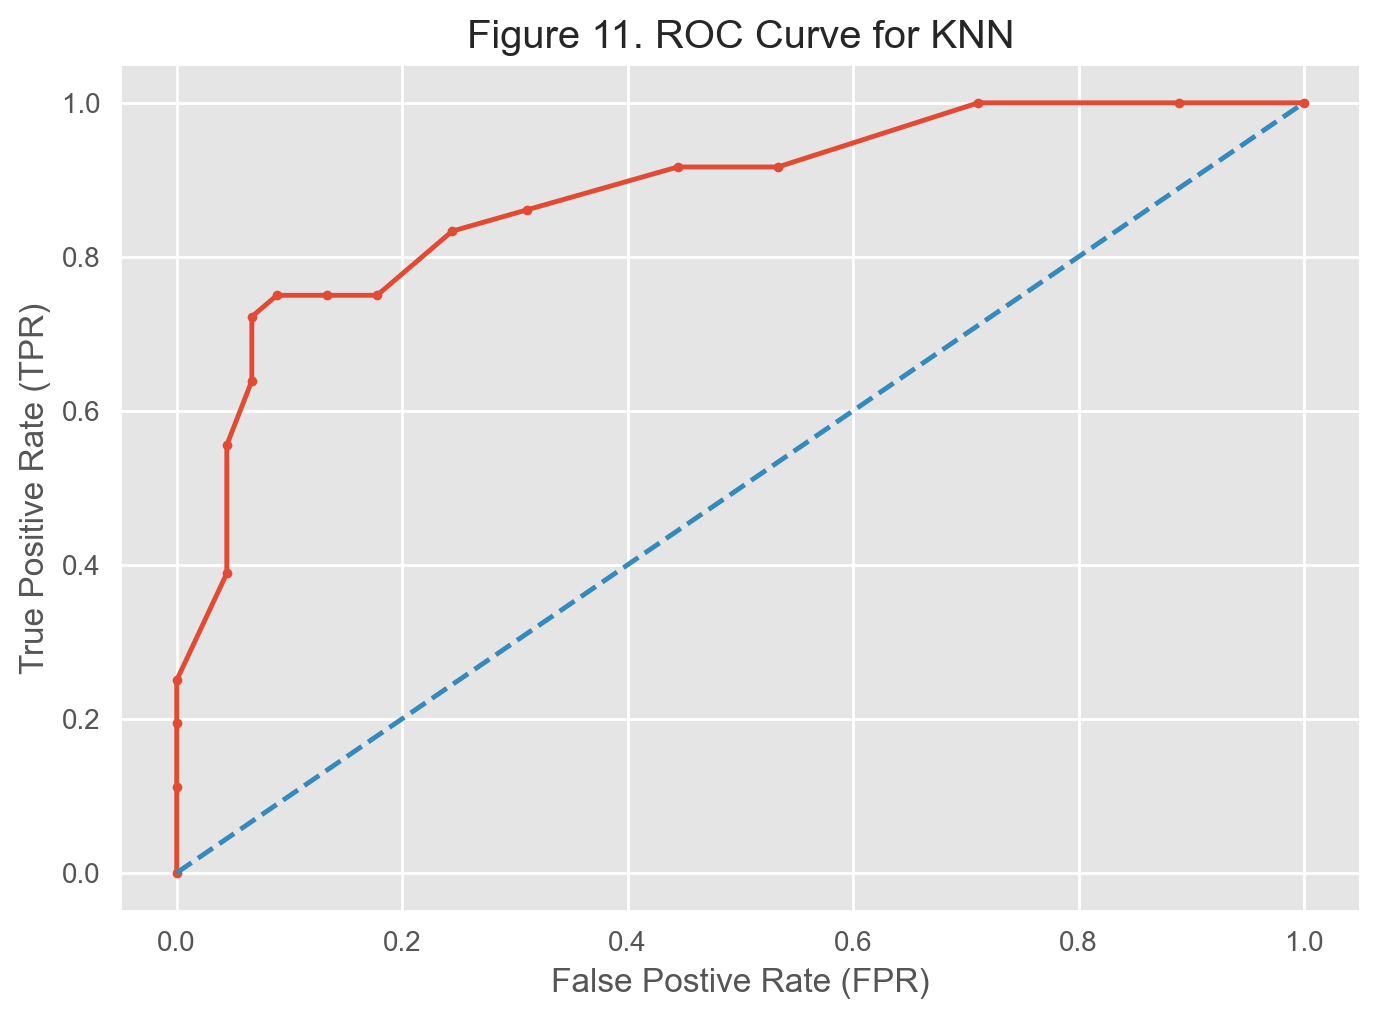

In [107]:
KNN_t_prob = gs_KNN.predict_proba(D_test)
fpr, tpr, _ = metrics.roc_curve(t_test, KNN_t_prob[:, 1])
KNN_roc_auc = metrics.auc(fpr, tpr)

df = pd.DataFrame({'fpr': fpr, 'tpr': tpr})

plt.style.use("ggplot")
    
ax = df.plot.line(x='fpr', y='tpr', title='Figure 11. ROC Curve for KNN', legend=False, marker = '.')
plt.plot([0, 1], [0, 1], '--')
ax.set_xlabel("False Postive Rate (FPR)")
ax.set_ylabel("True Positive Rate (TPR)")
plt.show();

The ROC curve for the K-Nearest Neighbors classifier shows a gradual increase in the true positive rate (TPR) as the false positive rate (FPR) increases. It indicates that the KNN model has some ability to distinguish between positive and negative instances, but the performance is not as strong as other classifiers.

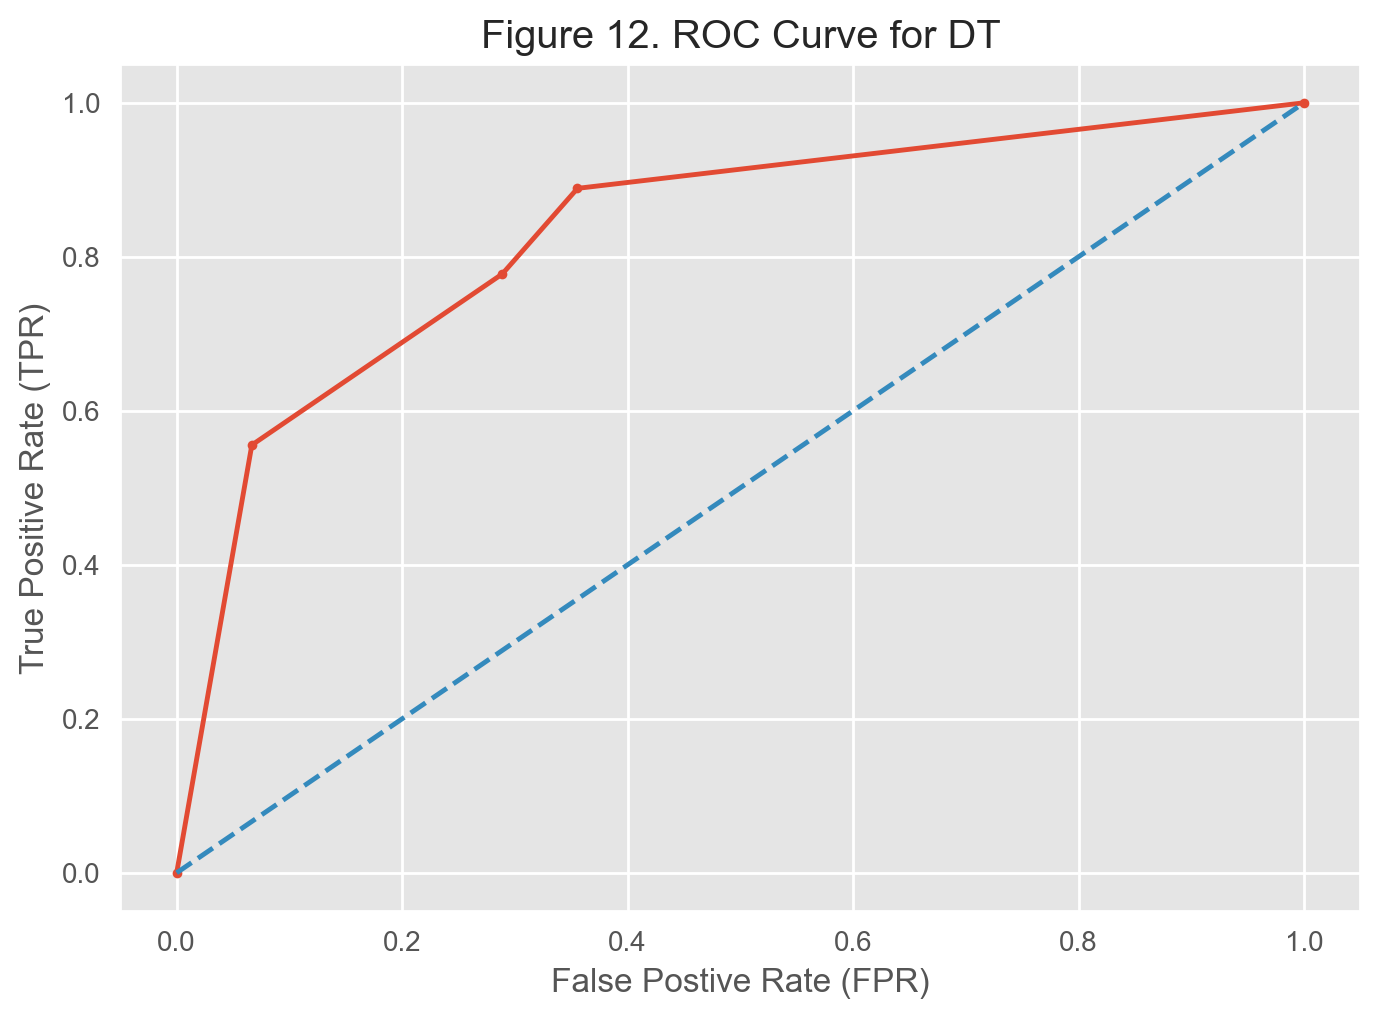

In [108]:
DT_t_prob = gs_DT.predict_proba(D_test)
fpr, tpr, _ = metrics.roc_curve(t_test, DT_t_prob[:, 1])
DT_roc_auc = metrics.auc(fpr, tpr)

df = pd.DataFrame({'fpr': fpr, 'tpr': tpr})

plt.style.use("ggplot")
    
ax = df.plot.line(x='fpr', y='tpr', title='Figure 12. ROC Curve for DT', legend=False, marker = '.')
plt.plot([0, 1], [0, 1], '--')
ax.set_xlabel("False Postive Rate (FPR)")
ax.set_ylabel("True Positive Rate (TPR)")
plt.show();

The ROC curve for the Decision Tree classifier shows a steep rise in the TPR as the FPR increases. This indicates that the DT model performs well in distinguishing between positive and negative instances, with a relatively low FPR.

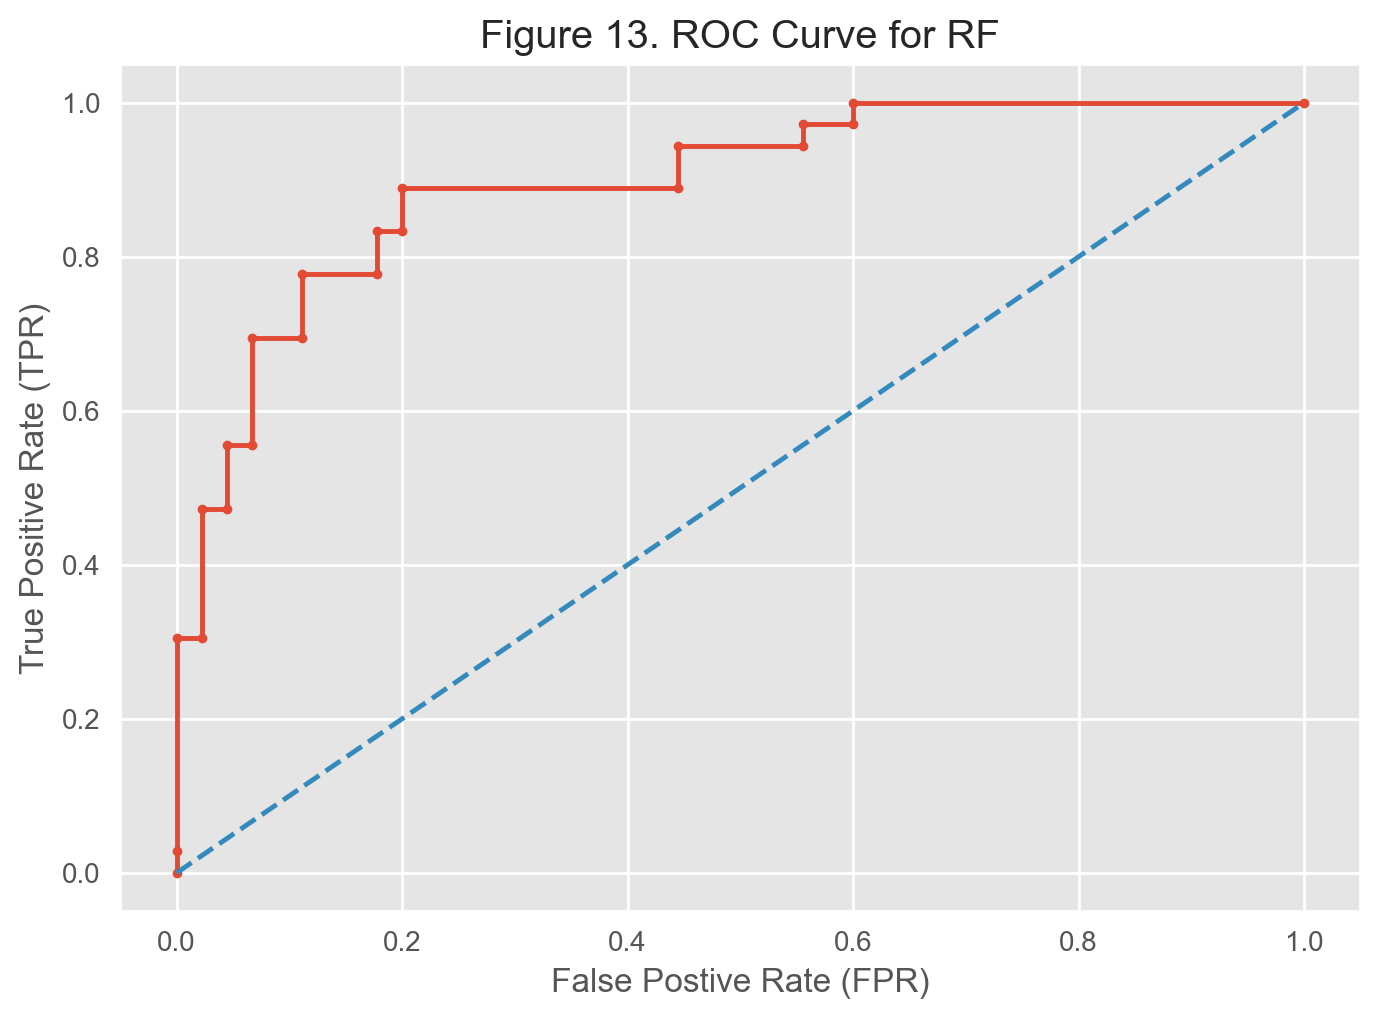

In [109]:
RF_t_prob = gs_RF.predict_proba(D_test)
fpr, tpr, _ = metrics.roc_curve(t_test, RF_t_prob[:, 1])
RF_roc_auc = metrics.auc(fpr, tpr)

df = pd.DataFrame({'fpr': fpr, 'tpr': tpr})

plt.style.use("ggplot")
    
ax = df.plot.line(x='fpr', y='tpr', title='Figure 13. ROC Curve for RF', legend=False, marker = '.')
plt.plot([0, 1], [0, 1], '--')
ax.set_xlabel("False Postive Rate (FPR)")
ax.set_ylabel("True Positive Rate (TPR)")
plt.show();

The ROC curve for the Random Forest classifier shows a steady increase in the TPR as the FPR increases. The curve indicates that the RF model has good discriminative ability, with a reasonably low FPR, making it effective in classifying positive instances.

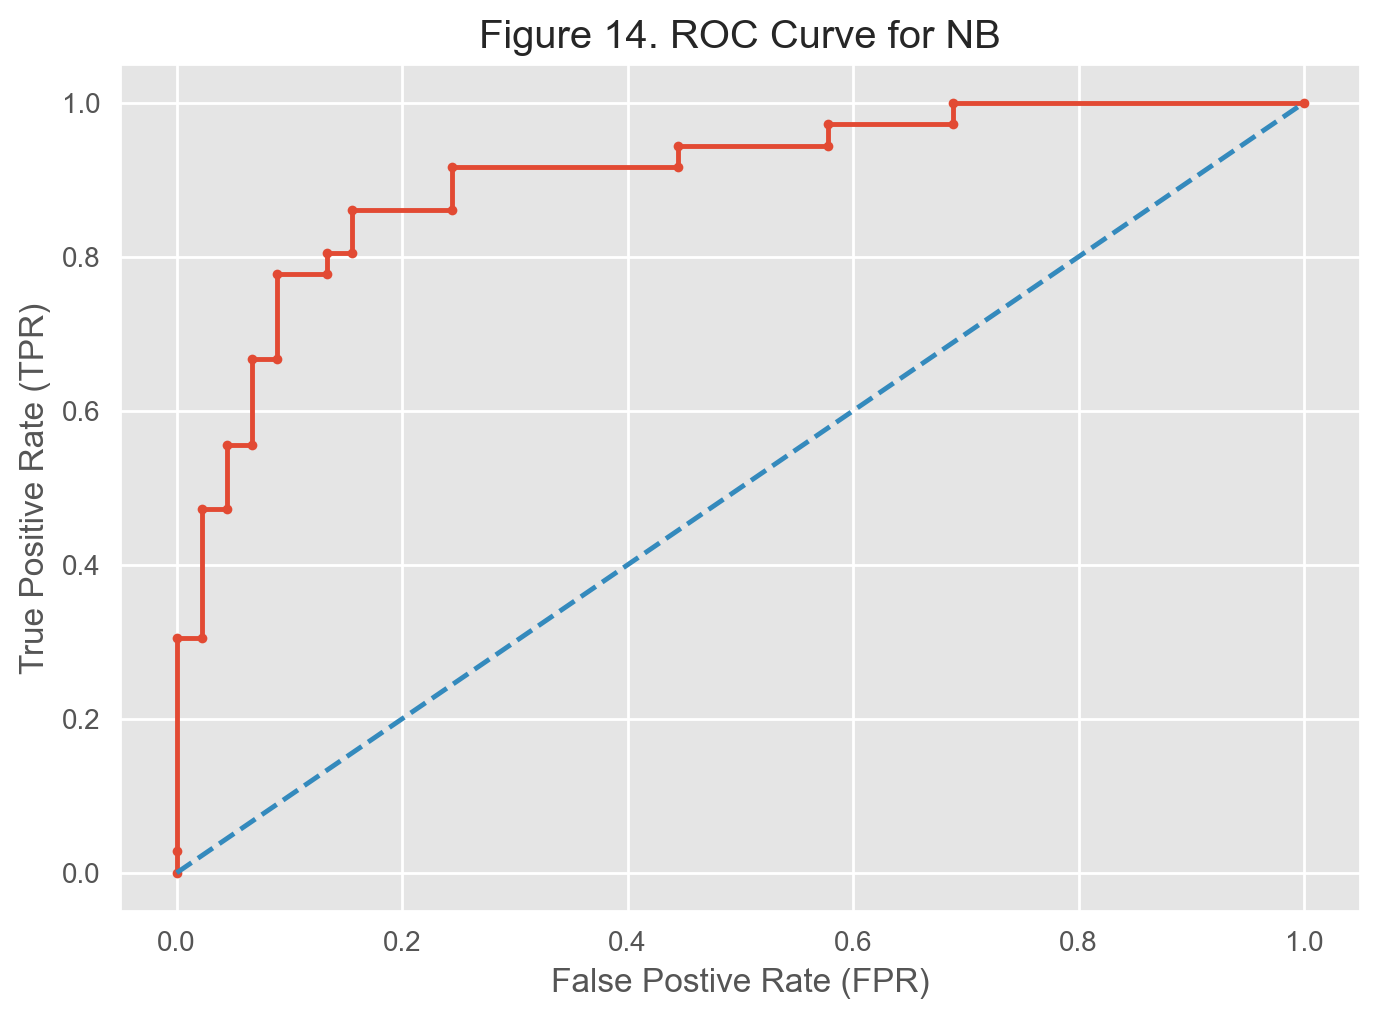

In [110]:
NB_t_prob = gs_NB.predict_proba(D_test)
fpr, tpr, _ = metrics.roc_curve(t_test, NB_t_prob[:, 1])
NB_roc_auc = metrics.auc(fpr, tpr)

df = pd.DataFrame({'fpr': fpr, 'tpr': tpr})

plt.style.use("ggplot")
    
ax = df.plot.line(x='fpr', y='tpr', title='Figure 14. ROC Curve for NB', legend=False, marker = '.')
plt.plot([0, 1], [0, 1], '--')
ax.set_xlabel("False Postive Rate (FPR)")
ax.set_ylabel("True Positive Rate (TPR)")
plt.show();

The ROC curve for the Gaussian Naive Bayes classifier demonstrates a gradual increase in the TPR as the FPR increases. The curve suggests that the NB model has good ability to differentiate between positive and negative instances. The curve demonstrates the NB classifier's strong predictive capability.

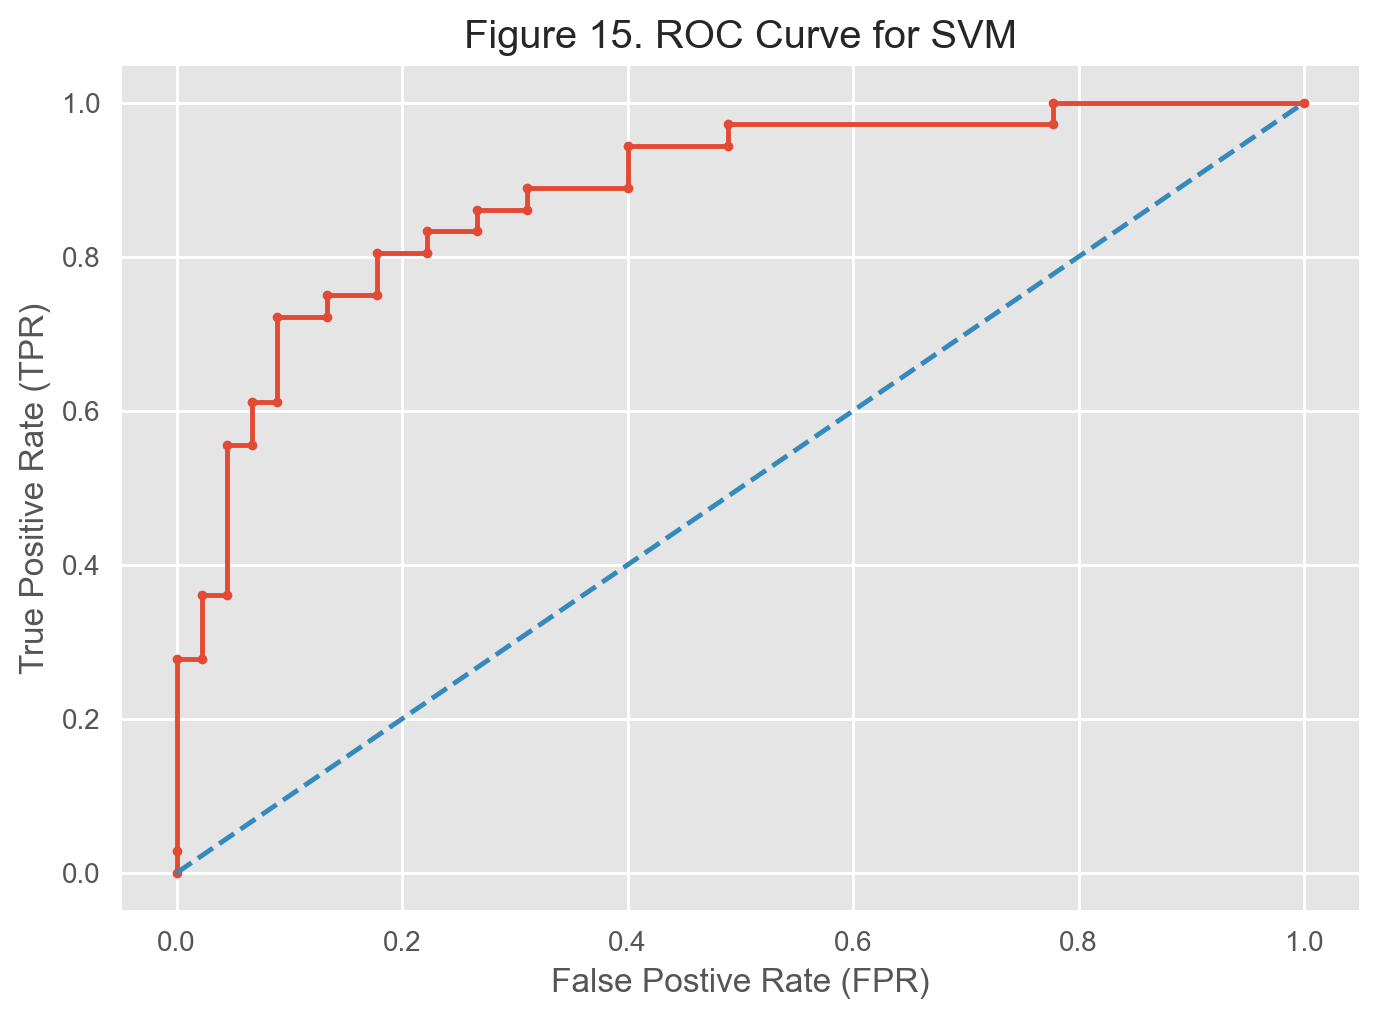

In [111]:
SVM_t_prob = gs_svm.predict_proba(D_test)
fpr, tpr, _ = metrics.roc_curve(t_test, SVM_t_prob[:, 1])
SVM_roc_auc = metrics.auc(fpr, tpr)

df = pd.DataFrame({'fpr': fpr, 'tpr': tpr})

plt.style.use("ggplot")
    
ax = df.plot.line(x='fpr', y='tpr', title='Figure 15. ROC Curve for SVM', legend=False, marker = '.')
plt.plot([0, 1], [0, 1], '--')
ax.set_xlabel("False Postive Rate (FPR)")
ax.set_ylabel("True Positive Rate (TPR)")
plt.show();

The ROC curve for the Support Vector Machine classifier displays a steep rise in the TPR as the FPR increases. This indicates that the SVM model performs well in distinguishing between positive and negative instances, with a relatively low FPR.

### 3. Critique and Limitations:  <a class="anchor" id="3"></a>

Our approach for heart disease prediction utilizing K-Nearest Neighbors, Decision Tree, Random Forest, Gaussian Naive Bayes, Support Vector Machine, and Neural Networks has strengths and weaknesses. The diversity of classifiers employed allows us to explore different modeling techniques and capture various aspects of the data. This diversity enables us to gain insights into the predictive power of different algorithms and their performance on the "Statlog (Heart)" dataset.

The KNN classifier achieves its best performance with `'n_neighbors'` set to 25 and `'p'` set to 1, attaining a remarkable ROC AUC score of **0.919**. The Decision Tree classifier utilizes `'criterion'='entropy'`, `'max_depth'=2`, and `'min_samples_split'=2`, achieving a score of **0.847**. The Random Forest classifier performs exceptionally well with `'criterion'='gini'`, `'max_depth'=5`, and `'n_estimators'=250`, obtaining an impressive score of **0.923**. The Gaussian Naive Bayes classifier achieves its optimal performance with `'var_smoothing'` set to 0.008977951553033322, resulting in a score of **0.923**. Lastly, the SVM classifier demonstrates its best performance with a combination of hyperparameters: `'C'=100`, `'degree'=2`, `'gamma'='scale'`, and `'kernel'='linear'`, yielding a score of **0.923**.

Furthermore, our fine-tuned Neural Networks model showcases improved performance with adjustments made to various parameters. The model achieves an accuracy score of **0.852** and a ROC AUC score of **0.847** on the validation data. These scores highlight the effectiveness of our approach in capturing patterns and making predictions related to heart disease.

However, our approach relies heavily on individual classifiers, which may lead to bias towards the strengths and weaknesses of each algorithm. Additionally, the selection of hyperparameters for each algorithm may significantly impact their performance, and tuning them adequately requires careful attention. Furthermore, our approach assumes that the features used in the prediction models are appropriate and sufficient to capture the presence or absence of heart disease, but other relevant factors may not be considered, potentially leading to insignificant performance or missing crucial insights.

The performance of classifiers is evaluated using metrics such as accuracy, precision, recall, roc_auc, and F1-score, but these evaluations are based on the "Statlog (Heart)" dataset alone. Additionally, the interpretability of some of the classifiers, such as KNN and NN, is limited, which may limit or prevent the understanding of the underlying factors contributing to heart disease. Finally, the "Statlog (Heart)" dataset may not be representative, since data availability and quality might pose issues that affect the prediction models' accuracy and resilience.

Overall, our approach uses different classifiers to predict heart disease, but it is critical to be mindful of limitations and possible biases related to the algorithms, model interpretability, generalizability of the results, and dataset quality. More study and validation on other datasets would improve the accuracy and applicability of our methodology.

### 4. Summary and Conclusions:  <a class="anchor" id="4"></a>

#### 4.1 Project Summary:  <a class="anchor" id="4.1"></a>

In our heart disease prediction project, we undertook a comprehensive approach consisting of two phases. Phase 1 involved data preprocessing and exploratory data analysis, while Phase 2 focused on applying various machine learning algorithms to predict heart disease based on the cleaned dataset.

In Phase 1, we focused on data preprocessing and exploration. We cleaned the dataset by removing irrelevant features, handling missing values, and addressing outliers. Through various visualizations, we gained insights into the relationships between different attributes and the presence of heart disease.

In Phase 2, our objectives shifted towards predictive modeling. We performed feature selection to identify the most relevant attributes and then fitted and tuned multiple classifiers, including K-Nearest Neighbors, Decision Tree, Random Forest, Gaussian Naive Bayes, Support Vector Machine, and Neural Networks. We compared the performance of these models using evaluation metrics and statistical techniques, aiming to identify the most effective algorithms. The predictive models we developed showed promising results, with the Random Forest, Gaussian Naive Bayes, and Support Vector Machine classifiers achieving high ROC AUC scores.

#### 4.2 Summary of Findings:  <a class="anchor" id="4.2"></a>

Our project focused on predicting heart disease using machine learning algorithms and analyzing the performance of various classifiers. Our findings revealed important insights into the predictive power and effectiveness of different algorithms.

Through feature selection techniques, we discovered correlations and patterns among features associated with heart disease, such as maximum heart rate, chest pain type, major vessels, and old peak. These attributes played a significant role in predicting the disease.

Our results also showed that several classifiers performed well in detecting heart disease, with the Random Forest, Gaussian Naive Bayes, and Support Vector Machine classifiers achieving high ROC AUC scores. These models can be valuable tools for healthcare professionals in making informed decisions and facilitating early intervention.

However, the performance of classifiers relied heavily on the quality and representativeness of the dataset, while interpretability of models such as Neural Networks posed challenges in understanding the underlying factors contributing to heart disease.

#### 4.3 Conclusions:  <a class="anchor" id="4.3"></a>

In conclusion, our project aimed to develop a reliable heart disease prediction model using machine learning techniques. Through our analysis and experimentation, we have achieved several important conclusions that align with our initial goals and objectives.

Our data exploration and visualization revealed valuable insights into the relationships between various features and the presence of heart disease. We identified key risk factors, such as maximum heart rate, chest pain type, major vessels, and old peak which significantly contribute to the prediction of heart disease. This knowledge enhances our understanding of the disease and can aid healthcare professionals in making informed decisions.

Our analysis highlights the Gaussian Naive Bayes (NB) classifier as the best performing model for heart disease prediction. With a remarkable ROC AUC score of **0.923**, NB demonstrates a high level of accuracy in distinguishing between individuals with and without heart disease. Furthermore, the recall score of **0.83** indicates that NB is effective in identifying true positive cases, minimizing the risk of false negatives. These findings were further supported by the paired t-tests, which confirmed the statistically significant superiority of NB compared to other classifiers.

It is worth noting that the Neural Network model was challenging to fine-tune due to its complex architecture and need for extensive parameter tuning. However, it still showed promising performance with an accuracy score of **0.852** and a ROC AUC score of **0.847** on validation data.

In summary, Our project's findings contribute to the advancement of heart disease prediction by providing insights into risk factors and identifying the Gaussian Naive Bayes classifier as a highly effective model for heart disease prediction. These findings have implications for improving patient care, detecting heart disease earlier, and reducing the global cost of heart disease.

### 5. References:  <a class="anchor" id="5"></a>

- Case Study: Predicting Income Status | www.featureranking.com. (2022, February 27). www.featureranking.com. https://www.featureranking.com/tutorials/machine-learning-tutorials/case-study-predicting-income-status/


- SK Part 7: Neural Networks: A Simple Case Study | www.featureranking.com. (2022, February 27). www.featureranking.com. https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-7-neural-networks-simple-case-study/


- Team, K. (n.d.-a). Keras documentation: Optimizers. https://keras.io/api/optimizers/


- Team, K. (n.d.-b). Keras documentation: SGD. https://keras.io/api/optimizers/sgd/


- Pramoditha, R. (2022, September 17). Classification of Neural Network Hyperparameters - Towards Data Science. Medium. https://towardsdatascience.com/classification-of-neural-network-hyperparameters-c7991b6937c3


- Stewart, M., PhD. (2023, February 10). Simple Guide to Hyperparameter Tuning in Neural Networks. Medium. https://towardsdatascience.com/simple-guide-to-hyperparameter-tuning-in-neural-networks-3fe03dad8594


- Radhakrishnan, P. (2018, June 18). What are Hyperparameters ? and How to tune the Hyperparameters in a Deep Neural Network? Medium. https://towardsdatascience.com/what-are-hyperparameters-and-how-to-tune-the-hyperparameters-in-a-deep-neural-network-d0604917584a